In [51]:
import pandas as pd
import numpy as np
import os
from dotenv import dotenv_values, find_dotenv
import datetime as dt
import preparecorrelations as pc
pd.set_option('display.max_columns', None)
import regressions as reg
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [116]:
import importlib
importlib.reload(pc)
importlib.reload(reg)

<module 'regressions' from 'c:\\Users\\fuem\\Documents\\correlationmodule\\regressions.py'>

# module demo: various data and detrending techniques

In [53]:
# this looks for your configuration file and then reads it as a dictionary
config = dotenv_values(find_dotenv())

# set path using the dictionary key for which one you want
correlationpath = os.path.abspath(config["CORRELATIONDATA"]) + '\\'
cleandatapath = os.path.abspath(config["CLEANDATA"]) + '\\'
rawdatapath = os.path.abspath(config["RAWDATA"]) + '\\'
ocadatapath = os.path.abspath(config["FRANKELROSEDATA"]) + '\\'
gravitydatapath = os.path.abspath(config["GRAVITYDATA"]) + '\\'

In [54]:
# import haver data
xlsx = pd.ExcelFile(correlationpath + "gdp_consumption_haver_final.xlsx")
# haver real gdp
rgdp = pd.read_excel(xlsx, 'Real GDP')
# haver real consumption
rc = pd.read_excel(xlsx, 'Real C')

# oecd employment
oecdemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LREM64TT.STSA.Q/OECD")
# oecd unemployment
oecdunemployment = pc.get_from_oecd("STLABOUR/AUS+AUT+BEL+CAN+DNK+FIN+FRA+DEU+GRC+IRL+ITA+JPN+NOR+NLD+NZL+PRT+ESP+SWE+CHE+GBR+USA.LRUN64TT.STSA.Q/OECD")

# imf industrial production index
imfipi = pc.get_from_imf('CompactData/IFS/Q..AIP_SA_IX')


In [55]:
# the developed countries included in the gdp/consumption series
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Denmark", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", 
                  "Italy", "Japan", "Luxembourg", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", 
                  "Turkey", "U.K.", "U.S."] 

# the EMEs included in the gdp/consumption series
MSCI_EM_countries = ["Brazil", "Chile", "China", "Colombia", "Czech Republic", "Egypt", "Greece", "Hungary", "India", 
                     "Indonesia", "South Korea", "Kuwait", "Malaysia", "Mexico", "Peru", "Philippines", "Poland", "Qatar", 
                     "Saudi Arabia", "South Africa", "Taiwan", "Thailand", "Turkey", "United Arab Emirates"]

# some countries we wanted to remove from the GDP/consumption series for not having enough data (decided previously)
to_remove = ['Egypt', 'Saudi Arabia', 'Malaysia', 'Colombia', 'Qatar', 'Kuwait', 'China']

# the countries that will be used for the gdp/consumption stuff
original_countries = list(set(oecd_countries + MSCI_EM_countries) - set(to_remove))

# countries from richmond paper figures
allrichmondcountries = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'IND', 'IDN', 'IRL', 'ITA', 'JPN', 'KWT', 'MYS', 'MEX', 'NLD', 
                        'NZL', 'NOR', 'PHL', 'POL', 'PRT', 'KOR', 'SAU', 'SGP', 'ZAF', 'ESP', 'SWE', 'CHE', 'THA', 'TUR', 'ARE', 'GBR', 'USA']

# countries from frankel and rose paper
frankelrosecountries = ['AUS', 'AUT', 'BEL', 'CAN', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'JPN', 'NOR', 'NLD', 'NZL', 'PRT', 'ESP', 'SWE', 'CHE', 'GBR', 'USA']

## Haver data: Real GDP, HP Filter

In [56]:
# seasonally adjusting the gdp series (imf/oecd data are already seasonally adjusted)
rgdp_sa = pc.SeasonalAdjustment(pc.fixCols(rgdp, original_countries))

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.3 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.


 NOTE: Unable to test LS2008.4 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other regressors 
       (usually user-specified or previously identified outliers).

 NOTE: Unable to test LS2020.2 due to regression matrix singularity.
       The effect of this outlier is already accounted for by other reg

In [57]:
# show the detrended data

rgdp_detrend = pc.Prepare_Correlations(rgdp_sa, detrending="HP Filter", countries=list(rgdp_sa.columns)).detrend(start_date="1998-01-01", end_date="2021-12-31")

rgdp_detrend.data.tail()

,AUS,AUT,BEL,CAN,DNK,FIN,FRA,DEU,GRC,ISL,IRL,ITA,JPN,LUX,NLD,NOR,PRT,ESP,SWE,CHE,GBR,USA,BRA,CHL,CZE,HUN,IND,IDN,KOR,MEX,PER,PHL,POL,ZAF,TWN,THA,TUR
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.006839,-0.034697,-0.020587,-0.008219,-0.016501,-0.007959,-0.014218,-0.008470,-0.038582,-0.035878,-0.037905,-0.025400,-0.003766,-0.011825,-0.023778,-0.012821,-0.020631,-0.028084,-0.019023,-0.012994,-0.024045,-0.016842,0.003531,-0.030358,-0.021741,-0.022619,0.025446,-0.016025,-0.014039,-0.009491,-0.001225,-0.041663,-0.026234,-0.005990,0.005214,-0.018284,0.008710
2021-01-01,0.007023,-0.040516,-0.010225,0.002295,-0.018020,-0.014397,-0.013196,-0.023081,0.003967,-0.024683,0.020385,-0.018077,-0.008639,0.019443,-0.028900,-0.011302,-0.049999,-0.031067,-0.008635,-0.015575,-0.037156,-0.005986,0.016313,0.000551,-0.026649,-0.012565,0.031235,-0.009807,-0.001409,-0.002360,0.021121,-0.031369,-0.019726,0.005607,0.029754,-0.016387,0.022995
2021-04-01,0.009913,-0.000377,0.004919,-0.007714,-0.002474,0.001154,-0.002404,-0.001939,0.012766,-0.000505,0.028393,0.003262,-0.000757,0.012043,0.004534,-0.007801,-0.007738,-0.018122,-0.004163,-0.001174,0.017095,0.007198,0.017532,0.010635,-0.015767,0.002979,-0.101502,-0.012693,0.001934,0.010403,0.024913,-0.036140,-0.008252,0.019332,0.011702,-0.015773,-0.013848
2021-07-01,-0.012174,0.032541,0.023173,0.003378,0.006495,0.010015,0.027470,0.011868,0.029161,-0.000728,0.030776,0.026595,0.000170,0.011360,0.020251,0.026611,0.017443,0.009554,0.011151,0.013620,0.026516,0.010359,0.017166,0.052483,-0.000866,0.006632,0.000976,-0.023498,0.000836,0.004429,0.060348,-0.010720,0.007099,0.003567,0.007841,-0.021880,0.035527
2021-10-01,0.018754,0.019176,0.026304,0.017298,0.031741,0.015031,0.034792,0.009451,0.033290,-0.003675,-0.017823,0.039878,0.007820,0.011506,0.024767,0.020788,0.033230,0.032948,0.018992,0.014512,0.040928,0.021324,0.013964,0.062210,0.005748,0.019344,0.053022,0.007304,0.006990,0.010652,0.015421,0.014687,0.017687,0.016061,0.009898,-0.000818,0.051017


In [58]:
# show the correlation matrix

rgdpcorrelations = rgdp_detrend.get_correlationmatrix()

rgdpcorrelations

,USA,MEX,BEL,CAN,GBR,FRA,DNK,HUN,AUT,ZAF,SWE,JPN,ITA,CHE,DEU,ESP,CHL,NLD,PHL,CZE,IND,AUS,PER,FIN,PRT,POL,NOR,TUR,LUX,THA,ISL,KOR,BRA,TWN,GRC,IRL,IDN
USA,1.000000,0.918096,0.907854,0.902947,0.888706,0.857161,0.848856,0.847672,0.842206,0.839220,0.837735,0.825073,0.814819,0.792193,0.776853,0.770042,0.763758,0.758481,0.751891,0.747918,0.746826,0.741762,0.730112,0.716743,0.714004,0.710708,0.684739,0.682134,0.672836,0.627790,0.607812,0.603793,0.577605,0.540587,0.482172,0.473307,0.354208
MEX,0.918096,1.000000,0.911767,0.917000,0.905838,0.883857,0.829223,0.857352,0.867716,0.904258,0.836785,0.838937,0.871488,0.806342,0.859655,0.825544,0.788633,0.796938,0.793231,0.788571,0.794751,0.747536,0.799998,0.759087,0.752021,0.726514,0.665902,0.666265,0.656257,0.647998,0.640127,0.594537,0.598535,0.433907,0.489255,0.437614,0.456655
BEL,0.907854,0.911767,1.000000,0.890056,0.938824,0.953072,0.806018,0.842316,0.917148,0.892798,0.832460,0.772518,0.944722,0.844131,0.844117,0.892686,0.769410,0.850089,0.792086,0.778655,0.815847,0.741598,0.832585,0.714789,0.859486,0.811446,0.688902,0.609940,0.687071,0.620712,0.563099,0.659848,0.634180,0.444030,0.574462,0.453749,0.475976
CAN,0.902947,0.917000,0.890056,1.000000,0.876441,0.895835,0.781543,0.859490,0.868690,0.889647,0.776652,0.781138,0.835737,0.774362,0.826695,0.783973,0.762079,0.773772,0.787622,0.724496,0.772741,0.748245,0.787575,0.699859,0.749447,0.716932,0.665233,0.612896,0.600225,0.610395,0.575220,0.627902,0.699747,0.417210,0.446685,0.308742,0.487912
GBR,0.888706,0.905838,0.938824,0.876441,1.000000,0.931814,0.771252,0.894971,0.889862,0.925039,0.771206,0.775390,0.910521,0.771229,0.809396,0.899317,0.793213,0.790442,0.831251,0.759692,0.813939,0.795619,0.875744,0.646001,0.833947,0.729846,0.673931,0.603254,0.617159,0.634845,0.589733,0.522185,0.557895,0.312487,0.624738,0.403150,0.479769
FRA,0.857161,0.883857,0.953072,0.895835,0.931814,1.000000,0.771765,0.822033,0.914174,0.885474,0.767943,0.740574,0.956209,0.807781,0.840784,0.891508,0.752862,0.827073,0.770815,0.745476,0.820094,0.724347,0.869559,0.681913,0.861717,0.766132,0.665426,0.585344,0.627232,0.594056,0.546500,0.558974,0.640300,0.333629,0.526300,0.368111,0.440882
DNK,0.848856,0.829223,0.806018,0.781543,0.771252,0.771765,1.000000,0.777366,0.829404,0.734807,0.876864,0.773084,0.806763,0.835917,0.855380,0.736877,0.693970,0.835491,0.632240,0.819389,0.636044,0.531467,0.576346,0.830003,0.691779,0.676330,0.646092,0.634963,0.677362,0.493647,0.685422,0.619305,0.425693,0.511811,0.392924,0.499816,0.317108
HUN,0.847672,0.857352,0.842316,0.859490,0.894971,0.822033,0.777366,1.000000,0.836240,0.877889,0.786638,0.800265,0.828016,0.752497,0.793389,0.833679,0.767981,0.730526,0.800170,0.836760,0.731181,0.682270,0.742627,0.671203,0.746477,0.679138,0.642816,0.626699,0.528695,0.582281,0.624920,0.454164,0.569603,0.324456,0.606855,0.453428,0.509491
AUT,0.842206,0.867716,0.917148,0.868690,0.889862,0.914174,0.829404,0.836240,1.000000,0.844594,0.808670,0.746435,0.915650,0.857679,0.898361,0.871740,0.754411,0.907789,0.779659,0.832778,0.722891,0.680075,0.772240,0.803774,0.848439,0.835495,0.682889,0.532475,0.632177,0.599263,0.671554,0.610324,0.570082,0.329595,0.503546,0.367606,0.470159
ZAF,0.839220,0.904258,0.892798,0.889647,0.925039,0.885474,0.734807,0.877889,0.844594,1.000000,0.719085,0.752975,0.841464,0.768635,0.798696,0.830576,0.808529,0.755779,0.775330,0.753260,0.789611,0.784437,0.887190,0.649734,0.744678,0.694382,0.673340,0.617878,0.592791,0.592087,0.607104,0.476668,0.659437,0.289539,0.583527,0.365208,0.553559


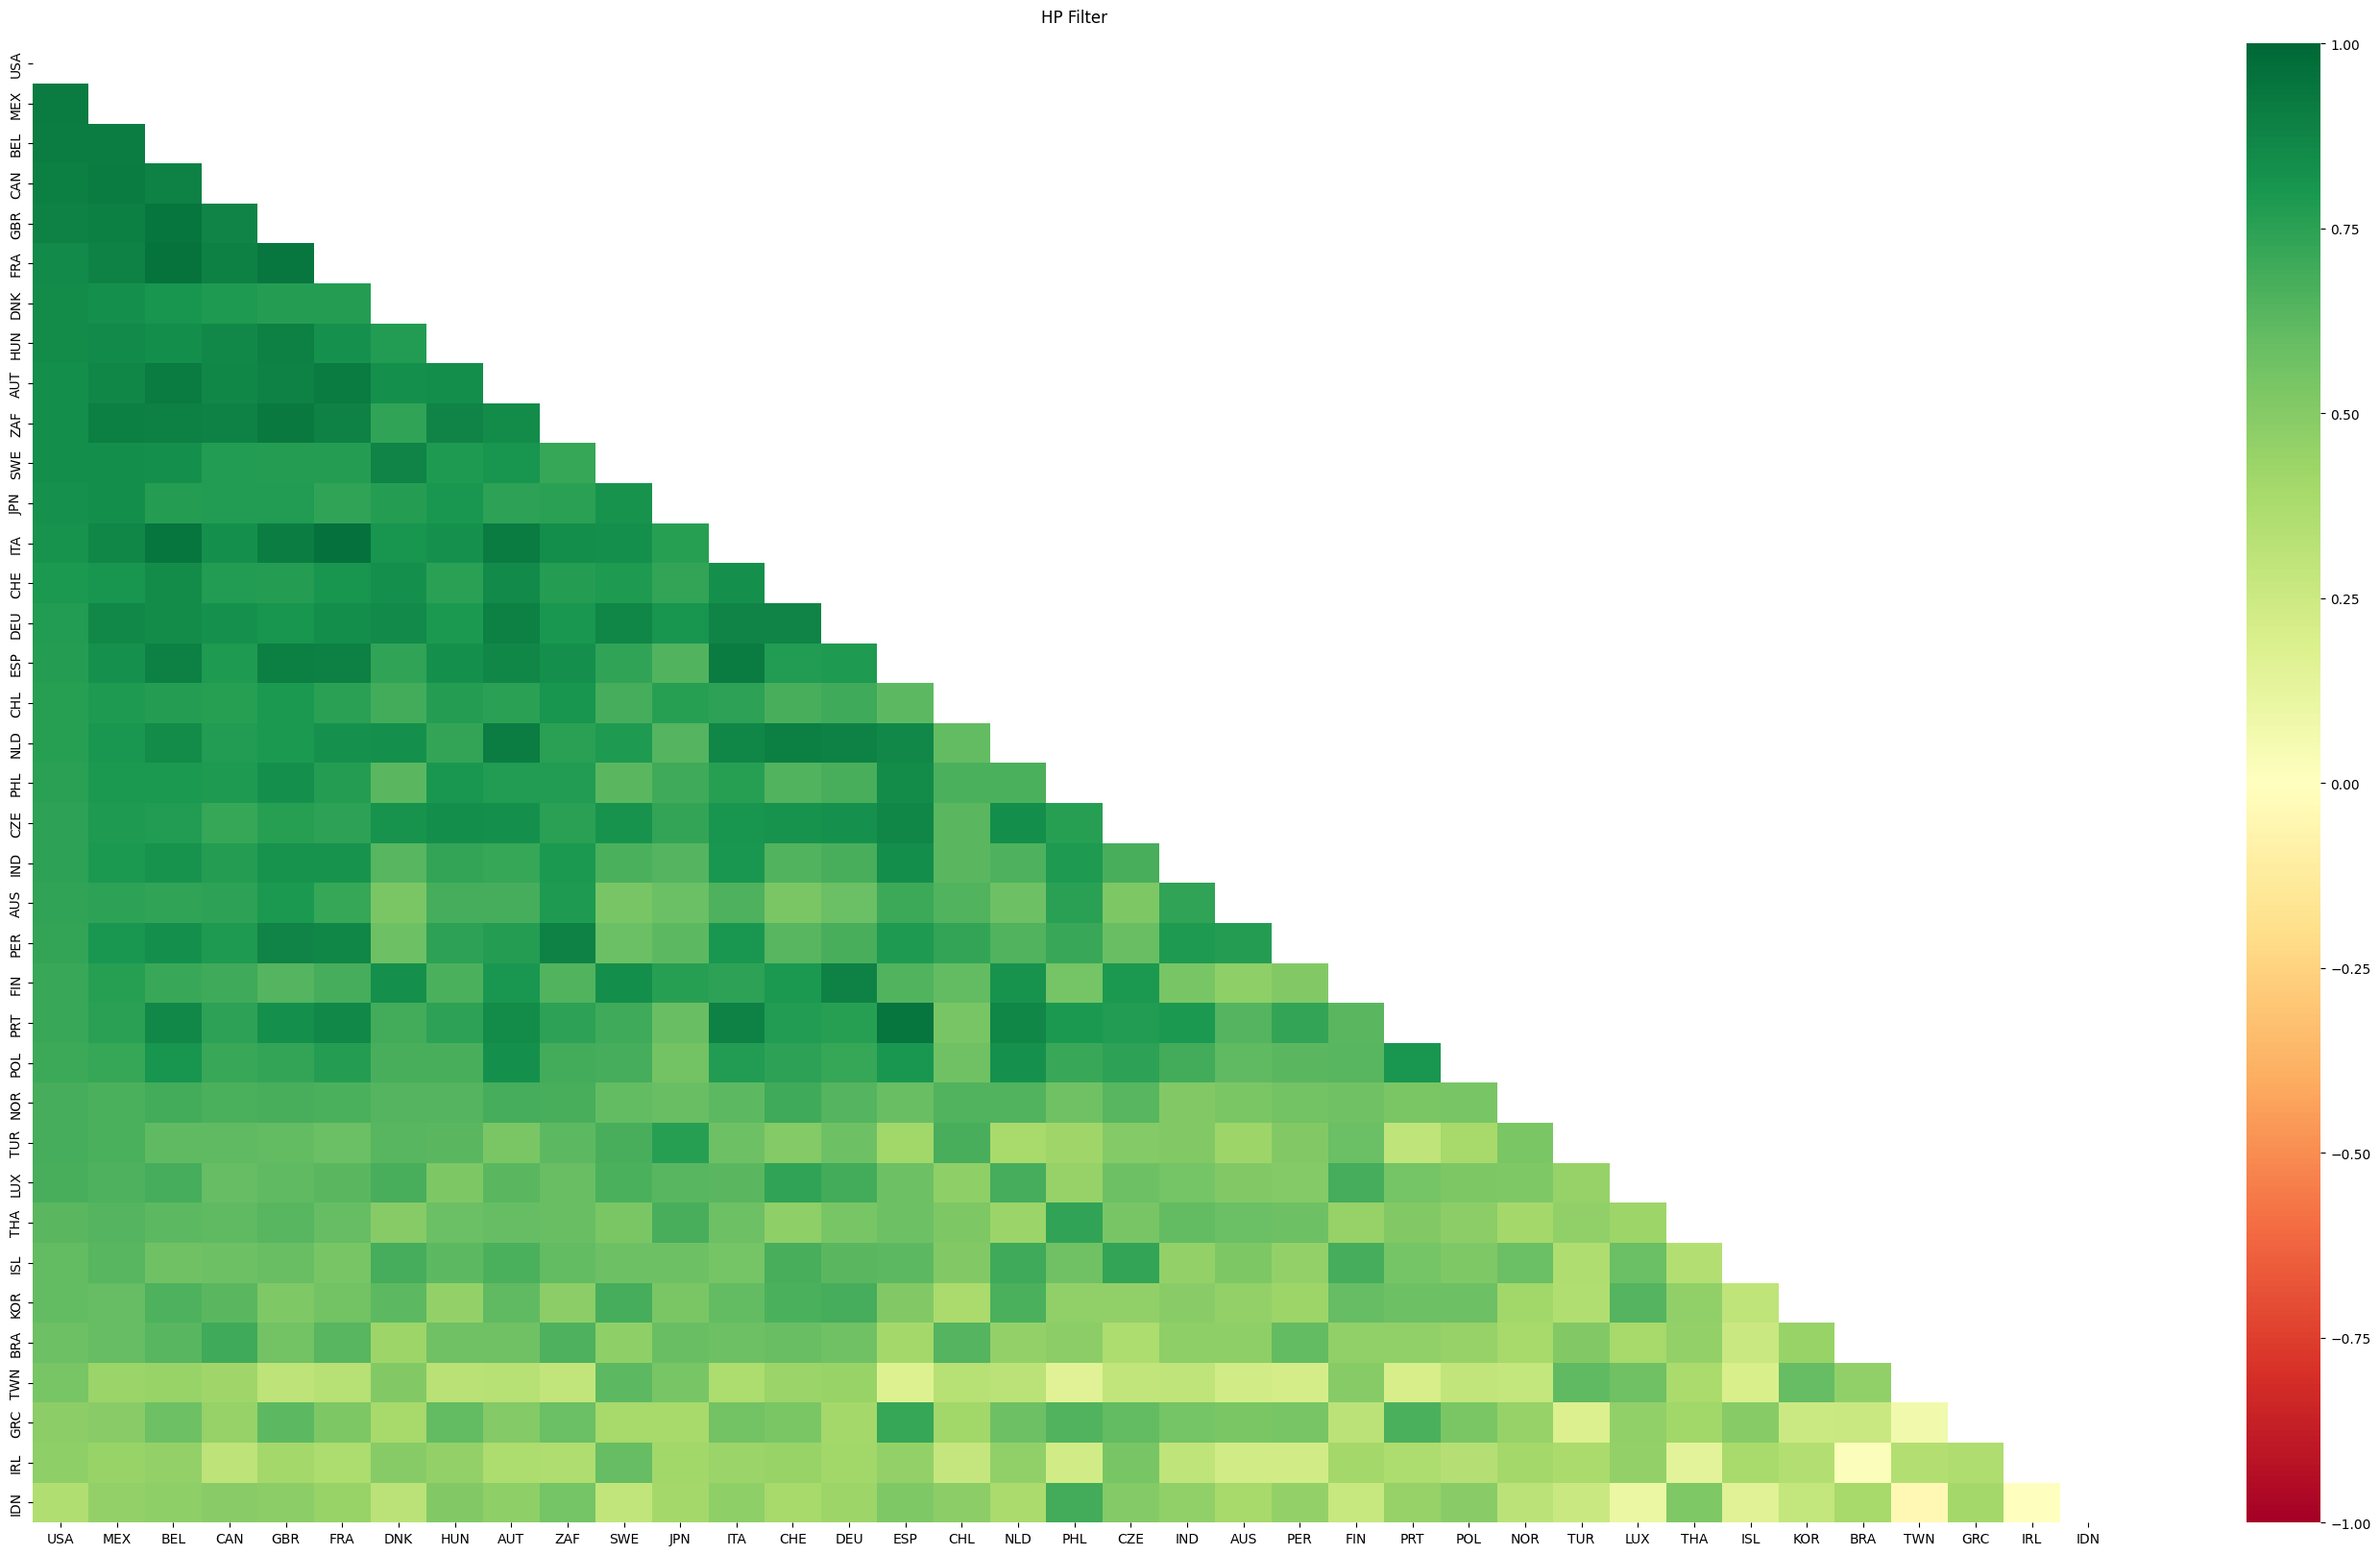

In [59]:

# show the heatmap visualisation

rgdpheatmap = rgdp_detrend.get_heatmap()

In [60]:
# show the reshaped version

rgdpreshaped = rgdp_detrend.get_organized()

rgdpreshaped.tail()

,iso3_firstcountry,iso3_secondcountry,correlation
1256,TWN,IRL,0.350499
1257,TWN,IDN,-0.045611
1293,GRC,IRL,0.366505
1294,GRC,IDN,0.403062
1331,IRL,IDN,0.006740


## OECD data: employment rate, first differences

In [61]:
# show the detrended data

oecdemploymentdetrend = pc.Prepare_Correlations(oecdemployment, detrending="first difference", countries=frankelrosecountries).detrend(start_date="1998-01-01", end_date="2021-12-31")

oecdemploymentdetrend.data.tail()

,AUS,AUT,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,GBR,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,0.020503,-0.002158,-0.007761,0.024750,0.006314,0.007662,0.006535,0.006572,0.004509,0.005343,-0.004609,-0.031442,0.005114,0.005268,0.003984,0.004646,0.005792,0.005907,0.011974,0.002928,0.022168
2021-01-01,0.010624,-0.005550,-0.005444,-0.000923,-0.015866,-0.001915,-0.004750,0.002124,0.004210,0.004572,0.001228,-0.001596,-0.006199,-0.011254,0.003220,0.002399,0.003801,0.007751,-0.004738,-0.002946,0.007604
2021-04-01,0.010976,0.008960,0.022152,0.006443,-0.006855,0.009305,0.022095,0.021085,0.015886,0.008791,0.004655,0.063860,0.045954,0.022085,0.000874,0.005199,0.014655,0.009879,0.020991,0.011805,0.007637
2021-07-01,-0.004722,0.015657,0.017938,0.018633,0.012557,0.012854,-0.001093,0.013857,-0.000609,0.006593,0.004214,0.028315,0.034523,0.015428,0.002694,0.007243,0.012122,0.015087,0.011396,0.004151,0.012247
2021-10-01,0.006843,0.004520,-0.003100,0.014749,0.008898,0.002737,0.013599,0.007882,0.009706,0.002545,0.001778,0.007707,0.013558,0.009893,-0.000894,0.005305,0.006163,0.002519,0.001087,0.005971,0.011098


In [62]:
# show the correlation matrix

oecdemploymentmatrix = oecdemploymentdetrend.get_correlationmatrix()

oecdemploymentmatrix

,USA,CAN,AUS,IRL,ESP,AUT,GRC,ITA,FRA,FIN,CHE,JPN,PRT,SWE,NOR,BEL,DNK,NLD,GBR,DEU,NZL
USA,1.000000,0.952678,0.866378,0.758840,0.700108,0.647509,0.643072,0.590617,0.522298,0.511488,0.502357,0.490880,0.473912,0.472621,0.428666,0.276015,0.250626,0.231341,0.202697,0.198878,0.153473
CAN,0.952678,1.000000,0.837731,0.712995,0.662053,0.672435,0.690388,0.569853,0.467312,0.482824,0.528502,0.378792,0.426120,0.414706,0.354502,0.272087,0.195856,0.201092,0.081529,0.256708,0.095444
AUS,0.866378,0.837731,1.000000,0.639926,0.661260,0.577351,0.554141,0.513960,0.528107,0.521346,0.374291,0.439207,0.443821,0.453895,0.415307,0.275133,0.196141,0.199631,0.152263,0.211695,0.147549
IRL,0.758840,0.712995,0.639926,1.000000,0.819984,0.586690,0.651884,0.682331,0.629057,0.628224,0.428912,0.505033,0.631164,0.647781,0.559506,0.386038,0.453346,0.175722,0.391150,0.393884,0.379245
ESP,0.700108,0.662053,0.661260,0.819984,1.000000,0.513420,0.692812,0.739244,0.637473,0.603602,0.444640,0.469917,0.719936,0.586340,0.411414,0.343272,0.476583,0.093657,0.350340,0.378359,0.352601
AUT,0.647509,0.672435,0.577351,0.586690,0.513420,1.000000,0.585282,0.313442,0.441045,0.462640,0.438094,0.344514,0.314235,0.415553,0.422194,0.350573,0.210111,0.179142,0.102970,0.321953,0.042301
GRC,0.643072,0.690388,0.554141,0.651884,0.692812,0.585282,1.000000,0.590092,0.391438,0.369155,0.222367,0.255097,0.455570,0.282189,0.294862,0.345432,0.334553,0.189995,0.103804,0.153440,0.081924
ITA,0.590617,0.569853,0.513960,0.682331,0.739244,0.313442,0.590092,1.000000,0.573247,0.474683,0.497543,0.265315,0.620858,0.546761,0.438063,0.287613,0.490527,0.282072,0.336053,0.390564,0.315062
FRA,0.522298,0.467312,0.528107,0.629057,0.637473,0.441045,0.391438,0.573247,1.000000,0.754015,0.308047,0.470197,0.736983,0.630654,0.523877,0.355295,0.494515,-0.019333,0.384100,0.483852,0.293316
FIN,0.511488,0.482824,0.521346,0.628224,0.603602,0.462640,0.369155,0.474683,0.754015,1.000000,0.277059,0.371483,0.472780,0.669421,0.523321,0.254590,0.462768,0.167429,0.338671,0.440337,0.168883


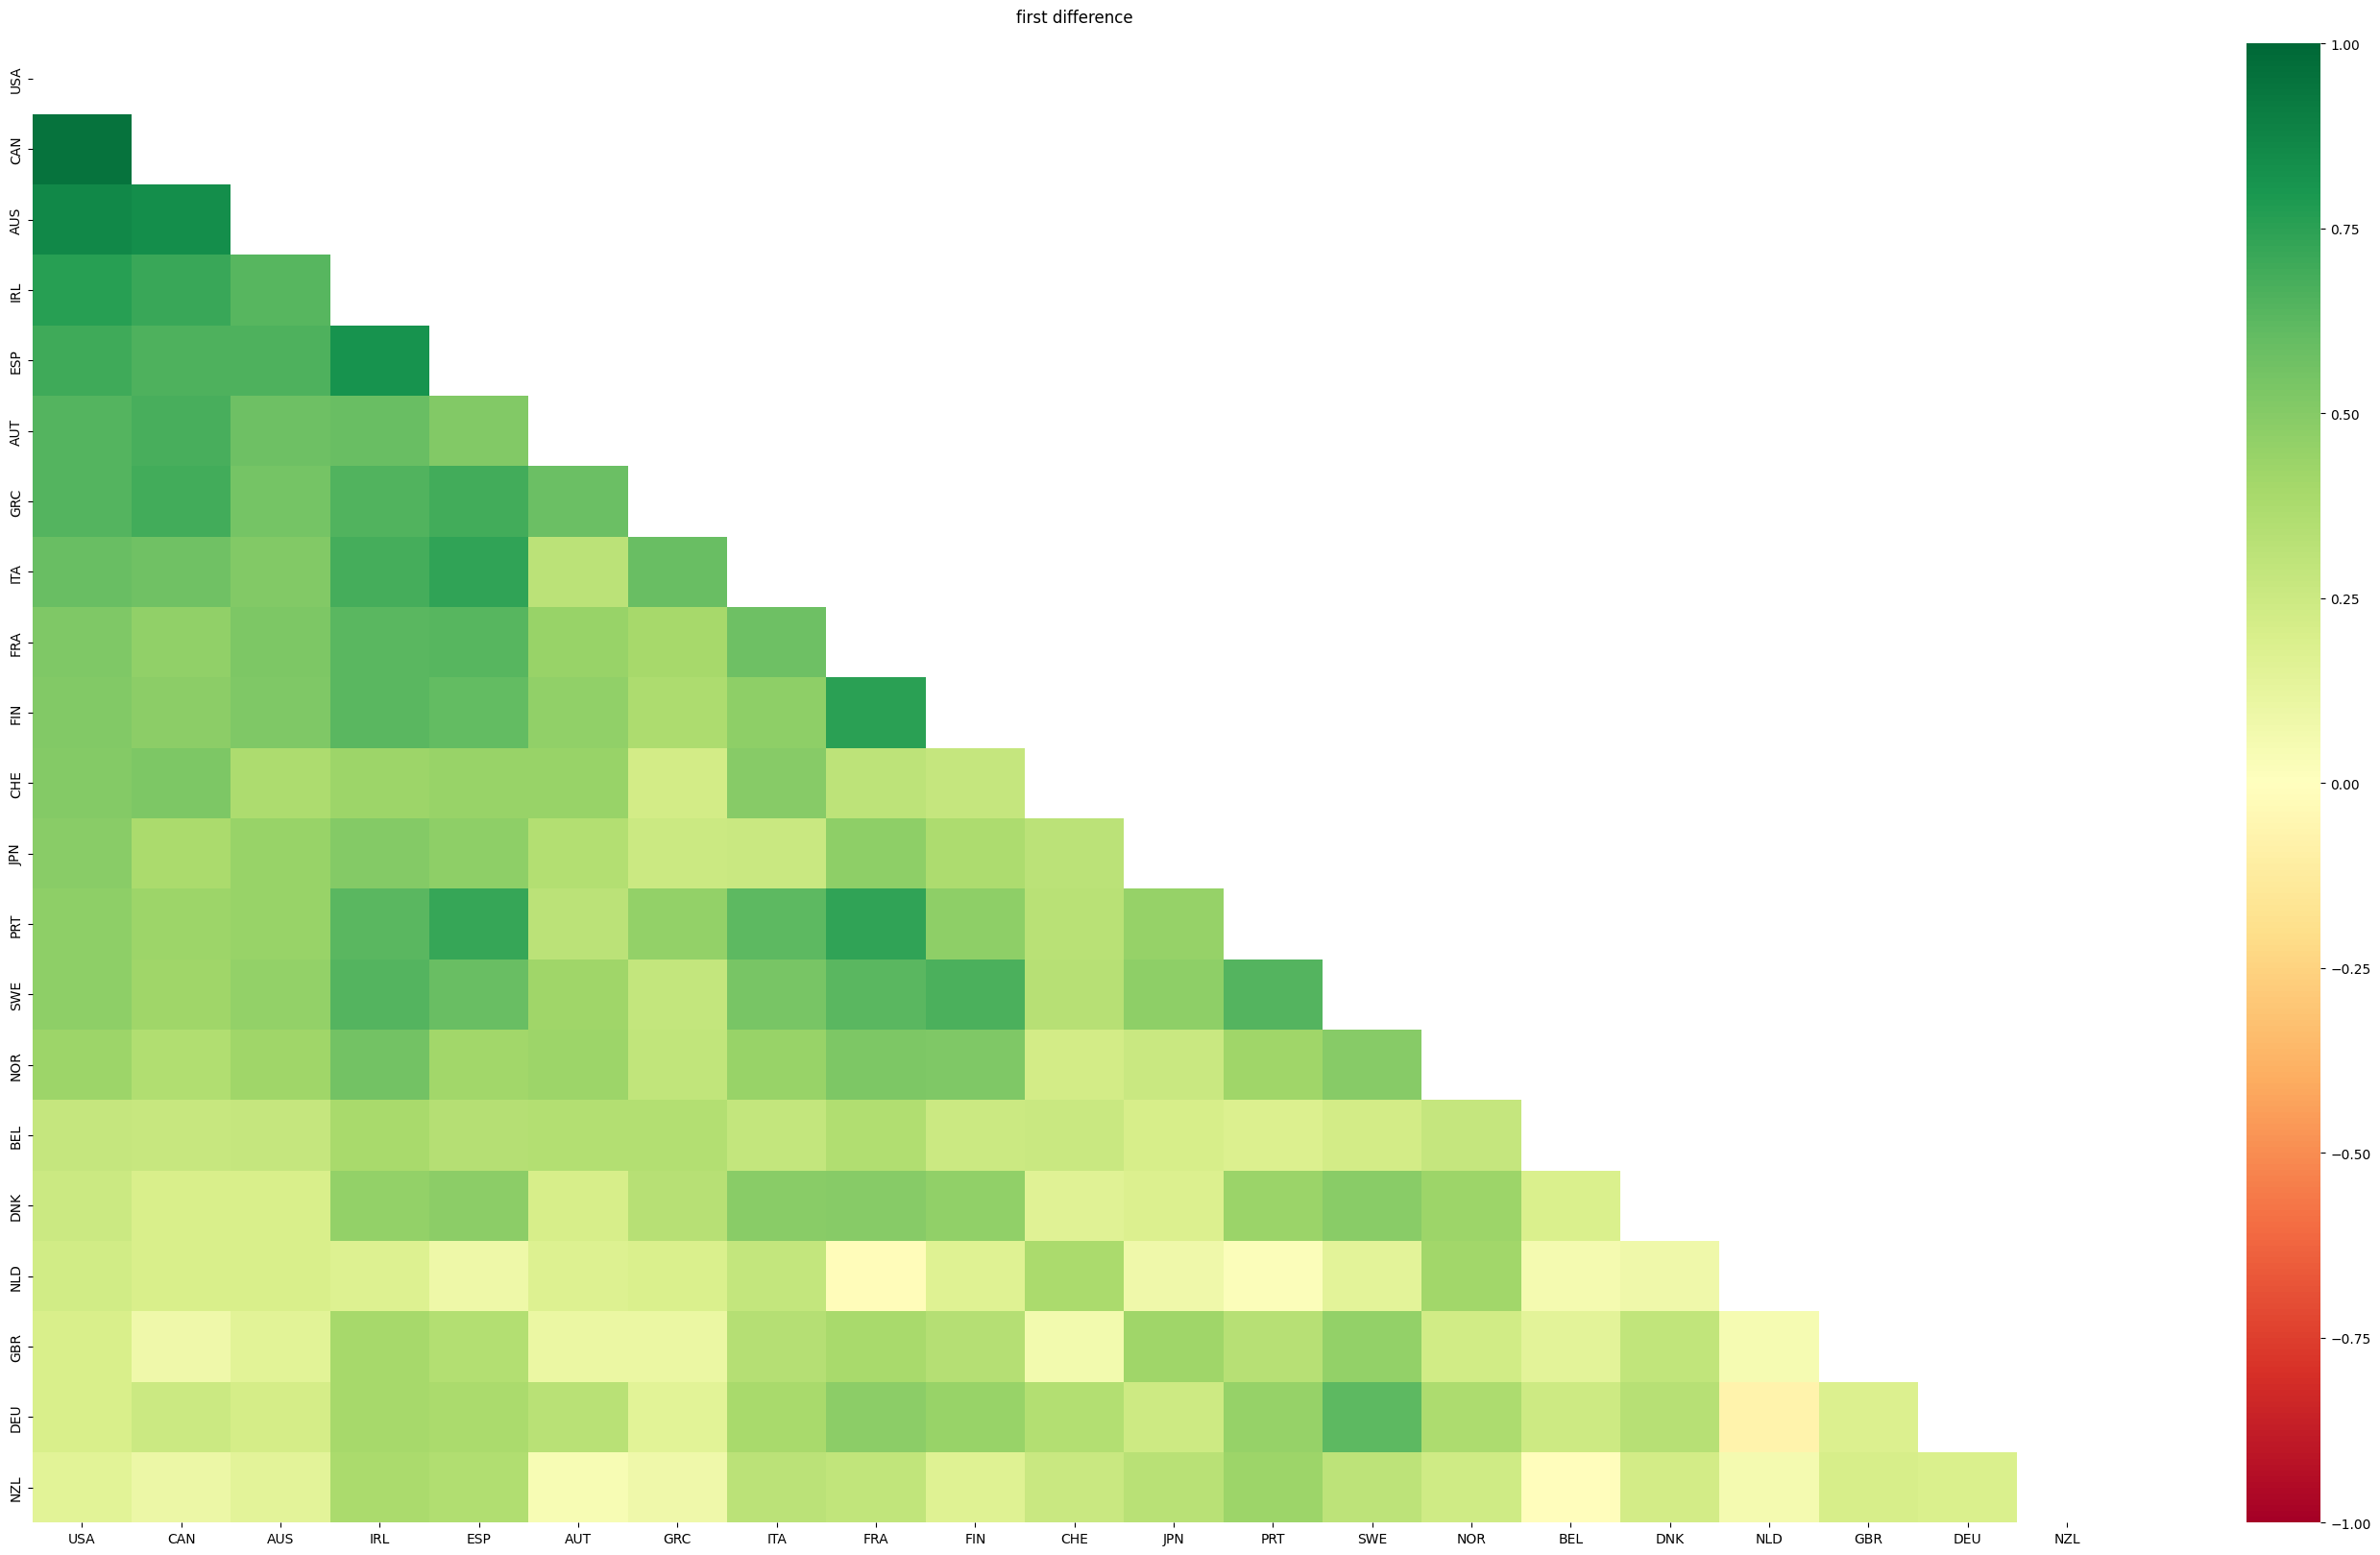

In [63]:
# show the heatmap visualisation

oecdemploymentheatmap = oecdemploymentdetrend.get_heatmap()

In [64]:
# show the reshaped version: 

oecdemploymentreshaped = oecdemploymentdetrend.get_organized()

oecdemploymentreshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,NLD,DEU,-0.073146
377,NLD,NZL,0.061160
397,GBR,DEU,0.186084
398,GBR,NZL,0.209660
419,DEU,NZL,0.191793


## IMF data: industrial production index, linear detrending

double check if i'm using the right data (should have a nice full series for all the countries?)

In [65]:
imfipidetrend = pc.Prepare_Correlations(imfipi, detrending="linear detrending", countries=frankelrosecountries).detrend(start_date="2000-01-01", end_date="2021-12-31")

imfipidetrend.data.tail()

,AUT,AUS,BEL,CAN,CHE,DEU,DNK,ESP,FIN,FRA,GBR,GRC,IRL,ITA,JPN,NLD,NOR,NZL,PRT,SWE,USA
date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.025409,-0.004551,-0.024625,0.012318,-0.020333,-0.053564,0.018416,0.062526,-0.000136,0.009615,0.125400,0.084492,0.238299,0.038333,-0.045025,-0.040450,0.038247,0.009412,0.059891,0.039099,-0.037263
2021-01-01,-0.015818,-0.053862,0.013492,0.021887,0.017126,-0.059146,0.062995,0.070603,0.014578,0.010167,0.125317,0.139382,0.307168,0.062543,-0.016733,-0.025389,0.072962,0.013371,0.053977,0.055399,-0.030721
2021-04-01,-0.005883,-0.057197,0.098616,0.015283,0.039161,-0.067846,0.059700,0.060519,0.019299,0.007665,0.127677,0.161779,0.255422,0.071672,-0.015054,-0.011545,0.079603,0.033684,0.023516,0.063547,-0.016220
2021-07-01,0.012246,-0.062273,0.085135,0.028318,0.031478,-0.098038,0.108732,0.060141,0.038375,0.008892,0.123620,0.180184,0.303085,0.085860,-0.033930,-0.004306,0.110702,-0.035773,0.023706,0.059056,-0.008840
2021-10-01,0.051735,-0.068893,0.058698,0.042329,0.025140,-0.075606,0.148337,0.094714,0.069005,0.010458,0.110280,0.214566,0.278517,0.098044,-0.025227,-0.001597,0.084794,0.007659,0.055126,0.075011,0.001608


In [66]:
# show the correlation matrix

imfipimatrix = imfipidetrend.get_correlationmatrix()

imfipimatrix

,USA,JPN,DEU,FRA,AUT,ITA,SWE,ESP,NZL,PRT,CAN,FIN,AUS,DNK,NLD,BEL,CHE,GBR,GRC,IRL,NOR
USA,1.000000,0.841215,0.799439,0.768083,0.714980,0.596314,0.558480,0.531214,0.523404,0.462413,0.444726,0.444380,0.438057,0.432231,0.426010,0.399130,0.361861,0.195465,0.145447,0.034092,-0.016829
JPN,0.841215,1.000000,0.801586,0.791771,0.792534,0.709933,0.718626,0.676468,0.687526,0.526182,0.296583,0.670424,0.641060,0.434336,0.578133,0.587378,0.425711,0.264084,0.306117,0.072553,0.025367
DEU,0.799439,0.801586,1.000000,0.682123,0.789947,0.479366,0.448587,0.351775,0.387898,0.279313,0.140142,0.448972,0.732564,0.090545,0.659523,0.549831,0.461807,-0.144580,-0.122272,-0.224028,-0.333578
FRA,0.768083,0.791771,0.682123,1.000000,0.780210,0.909149,0.809095,0.836748,0.689244,0.815201,0.574169,0.614427,0.442721,0.675478,0.365975,0.473301,0.321851,0.523730,0.488898,0.322194,0.231623
AUT,0.714980,0.792534,0.789947,0.780210,1.000000,0.742915,0.787830,0.669366,0.552898,0.465292,0.096185,0.802830,0.776198,0.417886,0.704200,0.806719,0.616783,0.237358,0.359276,0.000506,0.016041
ITA,0.596314,0.709933,0.479366,0.909149,0.742915,1.000000,0.897600,0.923013,0.672175,0.852652,0.508371,0.728799,0.364078,0.783362,0.280573,0.535613,0.403078,0.702308,0.730869,0.486391,0.446874
SWE,0.558480,0.718626,0.448587,0.809095,0.787830,0.897600,1.000000,0.889111,0.662563,0.706480,0.336719,0.877874,0.513136,0.761218,0.393149,0.651649,0.436841,0.627520,0.731261,0.365902,0.387430
ESP,0.531214,0.676468,0.351775,0.836748,0.669366,0.923013,0.889111,1.000000,0.772422,0.884549,0.446087,0.748525,0.330745,0.815772,0.209771,0.455386,0.274030,0.802011,0.826203,0.561872,0.539221
NZL,0.523404,0.687526,0.387898,0.689244,0.552898,0.672175,0.662563,0.772422,1.000000,0.653816,0.341035,0.549052,0.369952,0.514573,0.394509,0.383369,0.074858,0.546034,0.526155,0.315146,0.292941
PRT,0.462413,0.526182,0.279313,0.815201,0.465292,0.852652,0.706480,0.884549,0.653816,1.000000,0.605532,0.458840,0.094201,0.788741,-0.028392,0.179223,0.076628,0.782761,0.702214,0.594617,0.550058


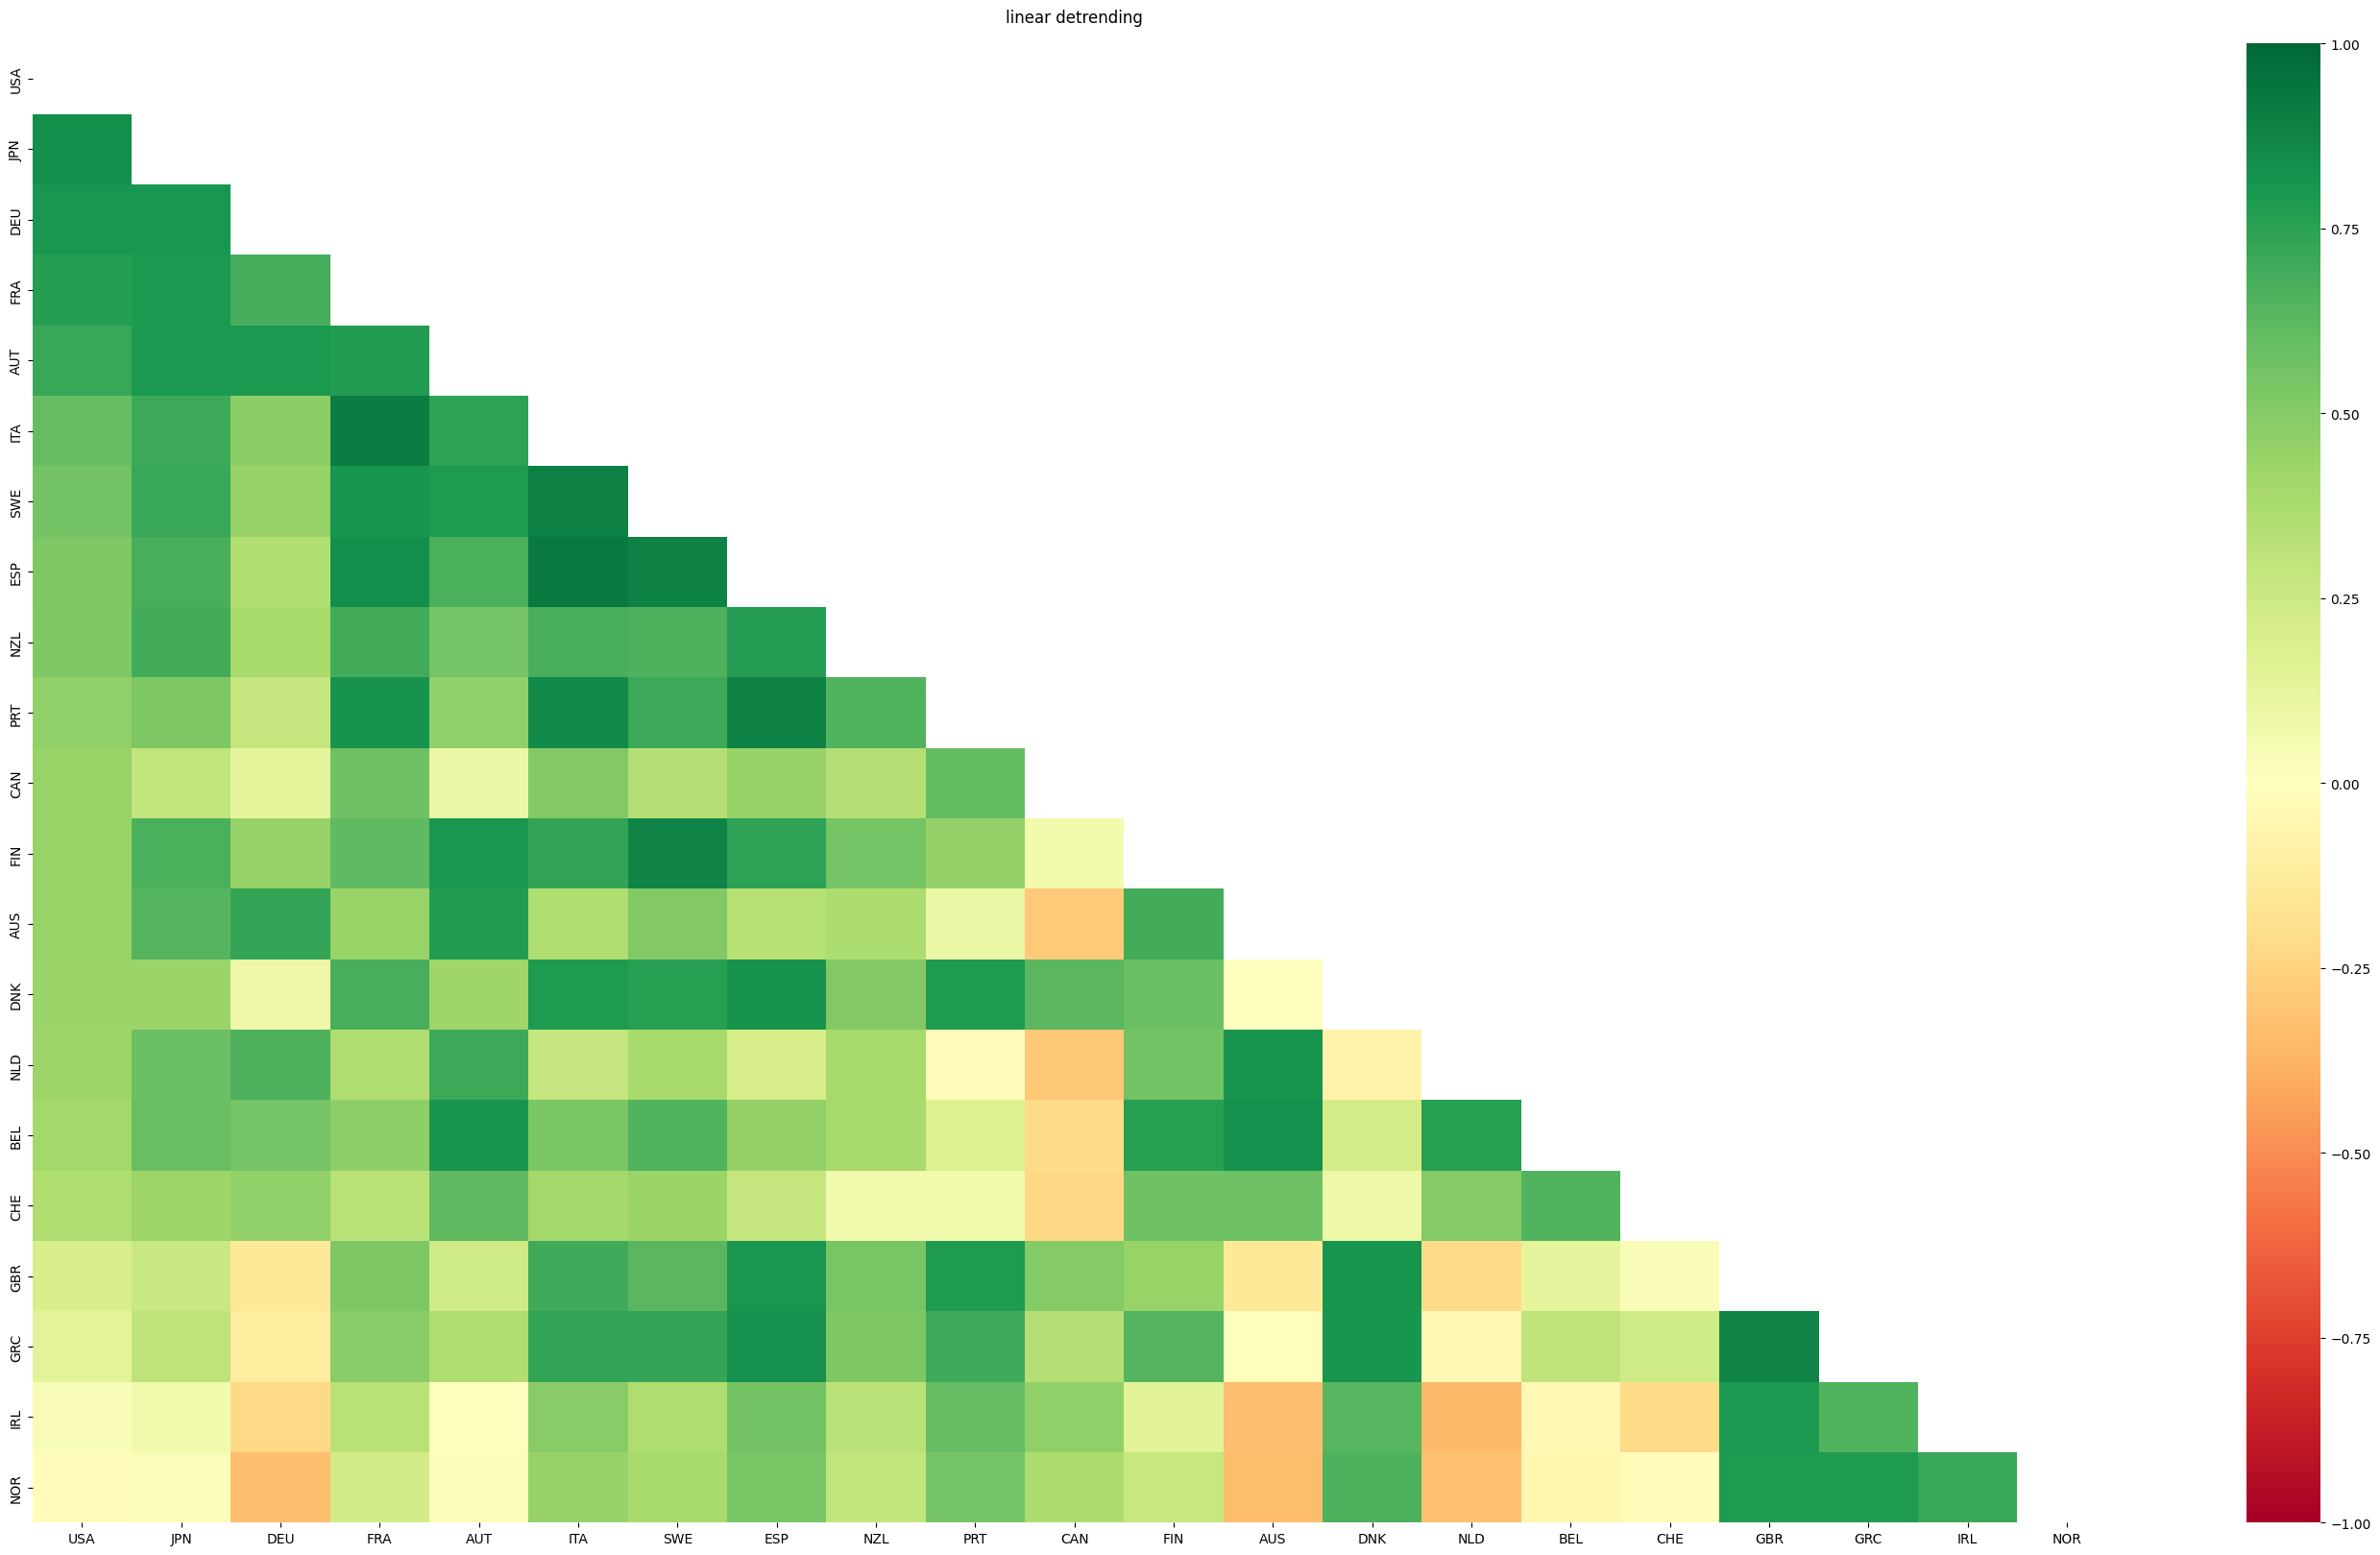

In [67]:
# show the heatmap visualisation

imfipiheatmap = imfipidetrend.get_heatmap()

In [68]:
# show the reshaped version: 

imfipireshaped = imfipidetrend.get_organized()

imfipireshaped.tail()


,iso3_firstcountry,iso3_secondcountry,correlation
376,GBR,IRL,0.792504
377,GBR,NOR,0.784399
397,GRC,IRL,0.654386
398,GRC,NOR,0.786516
419,IRL,NOR,0.718233


## Haver data: real consumption, fourth differences

In [69]:
# seasonally adjusting the consumption series (imf/oecd data are already seasonally adjusted)
rc_sa = pc.SeasonalAdjustment(pc.fixCols(rc, original_countries))

c:\Users\fuem\.conda\envs\myenv\Lib\site-packages\statsmodels\tsa\x13.py:189: X13Warning: WARNING: The covariance matrix of the ARMA parameters is singular,
          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.
  warn(errors, X13Warning)


In [70]:
rc_detrend = pc.Prepare_Correlations(rc_sa, detrending="fourth difference", countries=list(rc_sa.columns)).detrend(start_date="1998-01-01", end_date="2021-12-31")

rc_detrend.data.tail()

,AUS,AUT,BEL,CAN,DNK,FIN,FRA,DEU,GRC,ISL,IRL,ITA,JPN,LUX,NLD,NOR,PRT,ESP,SWE,CHE,GBR,USA,BRA,CHL,HUN,IND,IDN,KOR,MEX,PER,PHL,POL,ZAF,TWN,THA,TUR,CZE
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-01,-0.012572,-0.039522,-0.048952,-0.026744,0.026796,-0.031350,-0.010907,-0.042482,-0.074094,-0.023818,-0.066026,-0.029113,-0.023553,-0.010560,-0.049639,-0.012733,-0.030337,-0.040395,-0.029779,-0.001660,-0.061235,-0.007335,-0.009476,0.024424,-0.046682,0.023457,-0.048802,0.001304,-0.065304,0.004394,-0.059315,-0.019851,-0.036079,0.012530,0.001831,0.059185,-0.066025
2021-01-01,0.129966,0.048677,0.103275,0.128815,0.025155,0.072409,0.111185,0.028271,0.111222,0.095265,0.036050,0.083884,0.059231,0.196527,0.036568,0.053832,0.095390,0.156432,0.070789,0.041178,0.130022,0.122501,0.098234,0.273166,0.066628,0.328757,0.057011,0.001796,0.187932,0.195868,0.104497,0.096916,0.208323,0.054705,0.070660,0.198228,0.007057
2021-04-01,0.066606,-0.038063,-0.024640,0.006596,0.029128,0.014561,-0.044426,-0.043277,0.082239,0.024142,0.070056,0.014353,0.013472,0.008272,0.013126,-0.001487,0.023529,0.012647,0.040125,-0.007084,0.032368,0.064083,0.033972,0.165416,0.048709,-0.064964,0.044875,0.031099,0.087309,0.161081,-0.006075,0.011401,0.048238,-0.050272,-0.023530,0.026754,0.025045
2021-07-01,-0.025996,0.099424,0.103896,0.047659,0.045077,0.033149,0.065223,0.040509,0.073178,0.079029,0.093195,0.068305,-0.007599,0.052047,0.072550,0.062561,0.042705,0.025926,0.064939,0.034839,0.070237,0.060362,0.014193,0.140838,0.047046,-0.036067,-0.003846,0.045477,0.043446,0.043042,0.052399,0.085563,-0.004903,-0.043002,-0.035881,0.079716,0.109082
2021-10-01,0.021031,0.091872,0.086426,0.045585,0.085248,0.039173,0.071569,0.076563,0.064239,0.081703,0.135886,0.078397,0.019320,0.031436,0.099719,0.118603,0.099680,0.066845,0.055241,0.069835,0.111239,0.038734,0.016773,0.122666,0.054018,0.065631,0.001906,0.050582,0.027653,0.037230,0.060160,0.054551,0.012682,-0.008311,0.006399,0.184739,0.090007


In [71]:
# show the correlation matrix

rccorrelations = rc_detrend.get_correlationmatrix()

rccorrelations

,USA,MEX,ESP,GBR,ITA,CAN,SWE,PRT,AUS,FRA,ZAF,LUX,FIN,NLD,IRL,BEL,CHL,AUT,PHL,NOR,POL,CHE,GRC,JPN,DEU,HUN,PER,CZE,IND,ISL,DNK,KOR,TWN,TUR,IDN,BRA,THA
USA,1.000000,0.904197,0.898071,0.895105,0.871472,0.869906,0.843104,0.824185,0.811022,0.806508,0.804468,0.803731,0.787471,0.784426,0.777714,0.776068,0.765257,0.720178,0.718870,0.714707,0.685343,0.676293,0.660940,0.654735,0.642361,0.641792,0.638876,0.632375,0.591651,0.582303,0.534624,0.474680,0.463002,0.454618,0.445744,0.443743,0.393394
MEX,0.904197,1.000000,0.846812,0.876926,0.812991,0.894091,0.794389,0.754069,0.837103,0.738452,0.844285,0.778547,0.807371,0.712050,0.715022,0.776794,0.789986,0.684898,0.788869,0.734210,0.658057,0.670722,0.585542,0.720383,0.619871,0.571395,0.730377,0.594397,0.662133,0.533209,0.517435,0.456727,0.457005,0.437298,0.595783,0.562288,0.444321
ESP,0.898071,0.846812,1.000000,0.899624,0.912829,0.907804,0.820057,0.901562,0.842671,0.883835,0.803655,0.823991,0.833177,0.819536,0.812732,0.804696,0.675634,0.789713,0.773903,0.784532,0.743360,0.760357,0.746998,0.700447,0.721606,0.626077,0.592077,0.715400,0.675828,0.522249,0.558863,0.526201,0.533689,0.353994,0.478559,0.443447,0.416715
GBR,0.895105,0.876926,0.899624,1.000000,0.893901,0.909278,0.833262,0.844727,0.787395,0.872696,0.759142,0.794276,0.787875,0.834893,0.816692,0.886120,0.756870,0.832757,0.842164,0.846777,0.719435,0.839229,0.641626,0.747156,0.788822,0.592520,0.658304,0.730997,0.673341,0.525881,0.557089,0.493966,0.443978,0.424132,0.545900,0.460051,0.423774
ITA,0.871472,0.812991,0.912829,0.893901,1.000000,0.874163,0.868684,0.884117,0.747579,0.905056,0.707331,0.782411,0.768464,0.876885,0.826696,0.887849,0.728571,0.879100,0.764840,0.812702,0.808770,0.823731,0.652744,0.640107,0.783159,0.545052,0.632445,0.794582,0.641186,0.486155,0.545817,0.520850,0.405123,0.427148,0.439142,0.490875,0.325545
CAN,0.869906,0.894091,0.907804,0.909278,0.874163,1.000000,0.845164,0.809559,0.857415,0.890412,0.868577,0.846021,0.812969,0.758180,0.721134,0.888511,0.797333,0.821992,0.836660,0.839596,0.779104,0.784344,0.638120,0.755477,0.725820,0.489618,0.739678,0.657585,0.778442,0.493162,0.492832,0.481191,0.495047,0.485505,0.588311,0.665057,0.438083
SWE,0.843104,0.794389,0.820057,0.833262,0.868684,0.845164,1.000000,0.783781,0.748663,0.778362,0.690124,0.700303,0.710908,0.789815,0.783015,0.810364,0.715159,0.769393,0.711471,0.801391,0.647907,0.723694,0.573210,0.615523,0.671695,0.446015,0.617530,0.657146,0.543204,0.562518,0.514245,0.586005,0.479898,0.496822,0.478092,0.491914,0.272659
PRT,0.824185,0.754069,0.901562,0.844727,0.884117,0.809559,0.783781,1.000000,0.691599,0.828496,0.641056,0.734287,0.729796,0.864314,0.800938,0.783997,0.601361,0.734687,0.669732,0.709253,0.766959,0.732857,0.730468,0.568789,0.689345,0.587190,0.524548,0.726154,0.558482,0.447279,0.542282,0.493987,0.417937,0.346295,0.381950,0.398009,0.283091
AUS,0.811022,0.837103,0.842671,0.787395,0.747579,0.857415,0.748663,0.691599,1.000000,0.695227,0.858678,0.743633,0.768834,0.601113,0.625612,0.656200,0.718889,0.607914,0.723922,0.704236,0.613475,0.628531,0.570931,0.728341,0.532296,0.420427,0.744263,0.460305,0.713037,0.421413,0.386627,0.435056,0.567863,0.390179,0.625643,0.604960,0.447900
FRA,0.806508,0.738452,0.883835,0.872696,0.905056,0.890412,0.778362,0.828496,0.695227,1.000000,0.725191,0.834825,0.733332,0.793942,0.740218,0.915001,0.691713,0.877156,0.751816,0.814664,0.792445,0.869108,0.576341,0.661783,0.811805,0.437676,0.557550,0.671777,0.703008,0.429184,0.473144,0.470995,0.492227,0.449351,0.351907,0.519291,0.424481


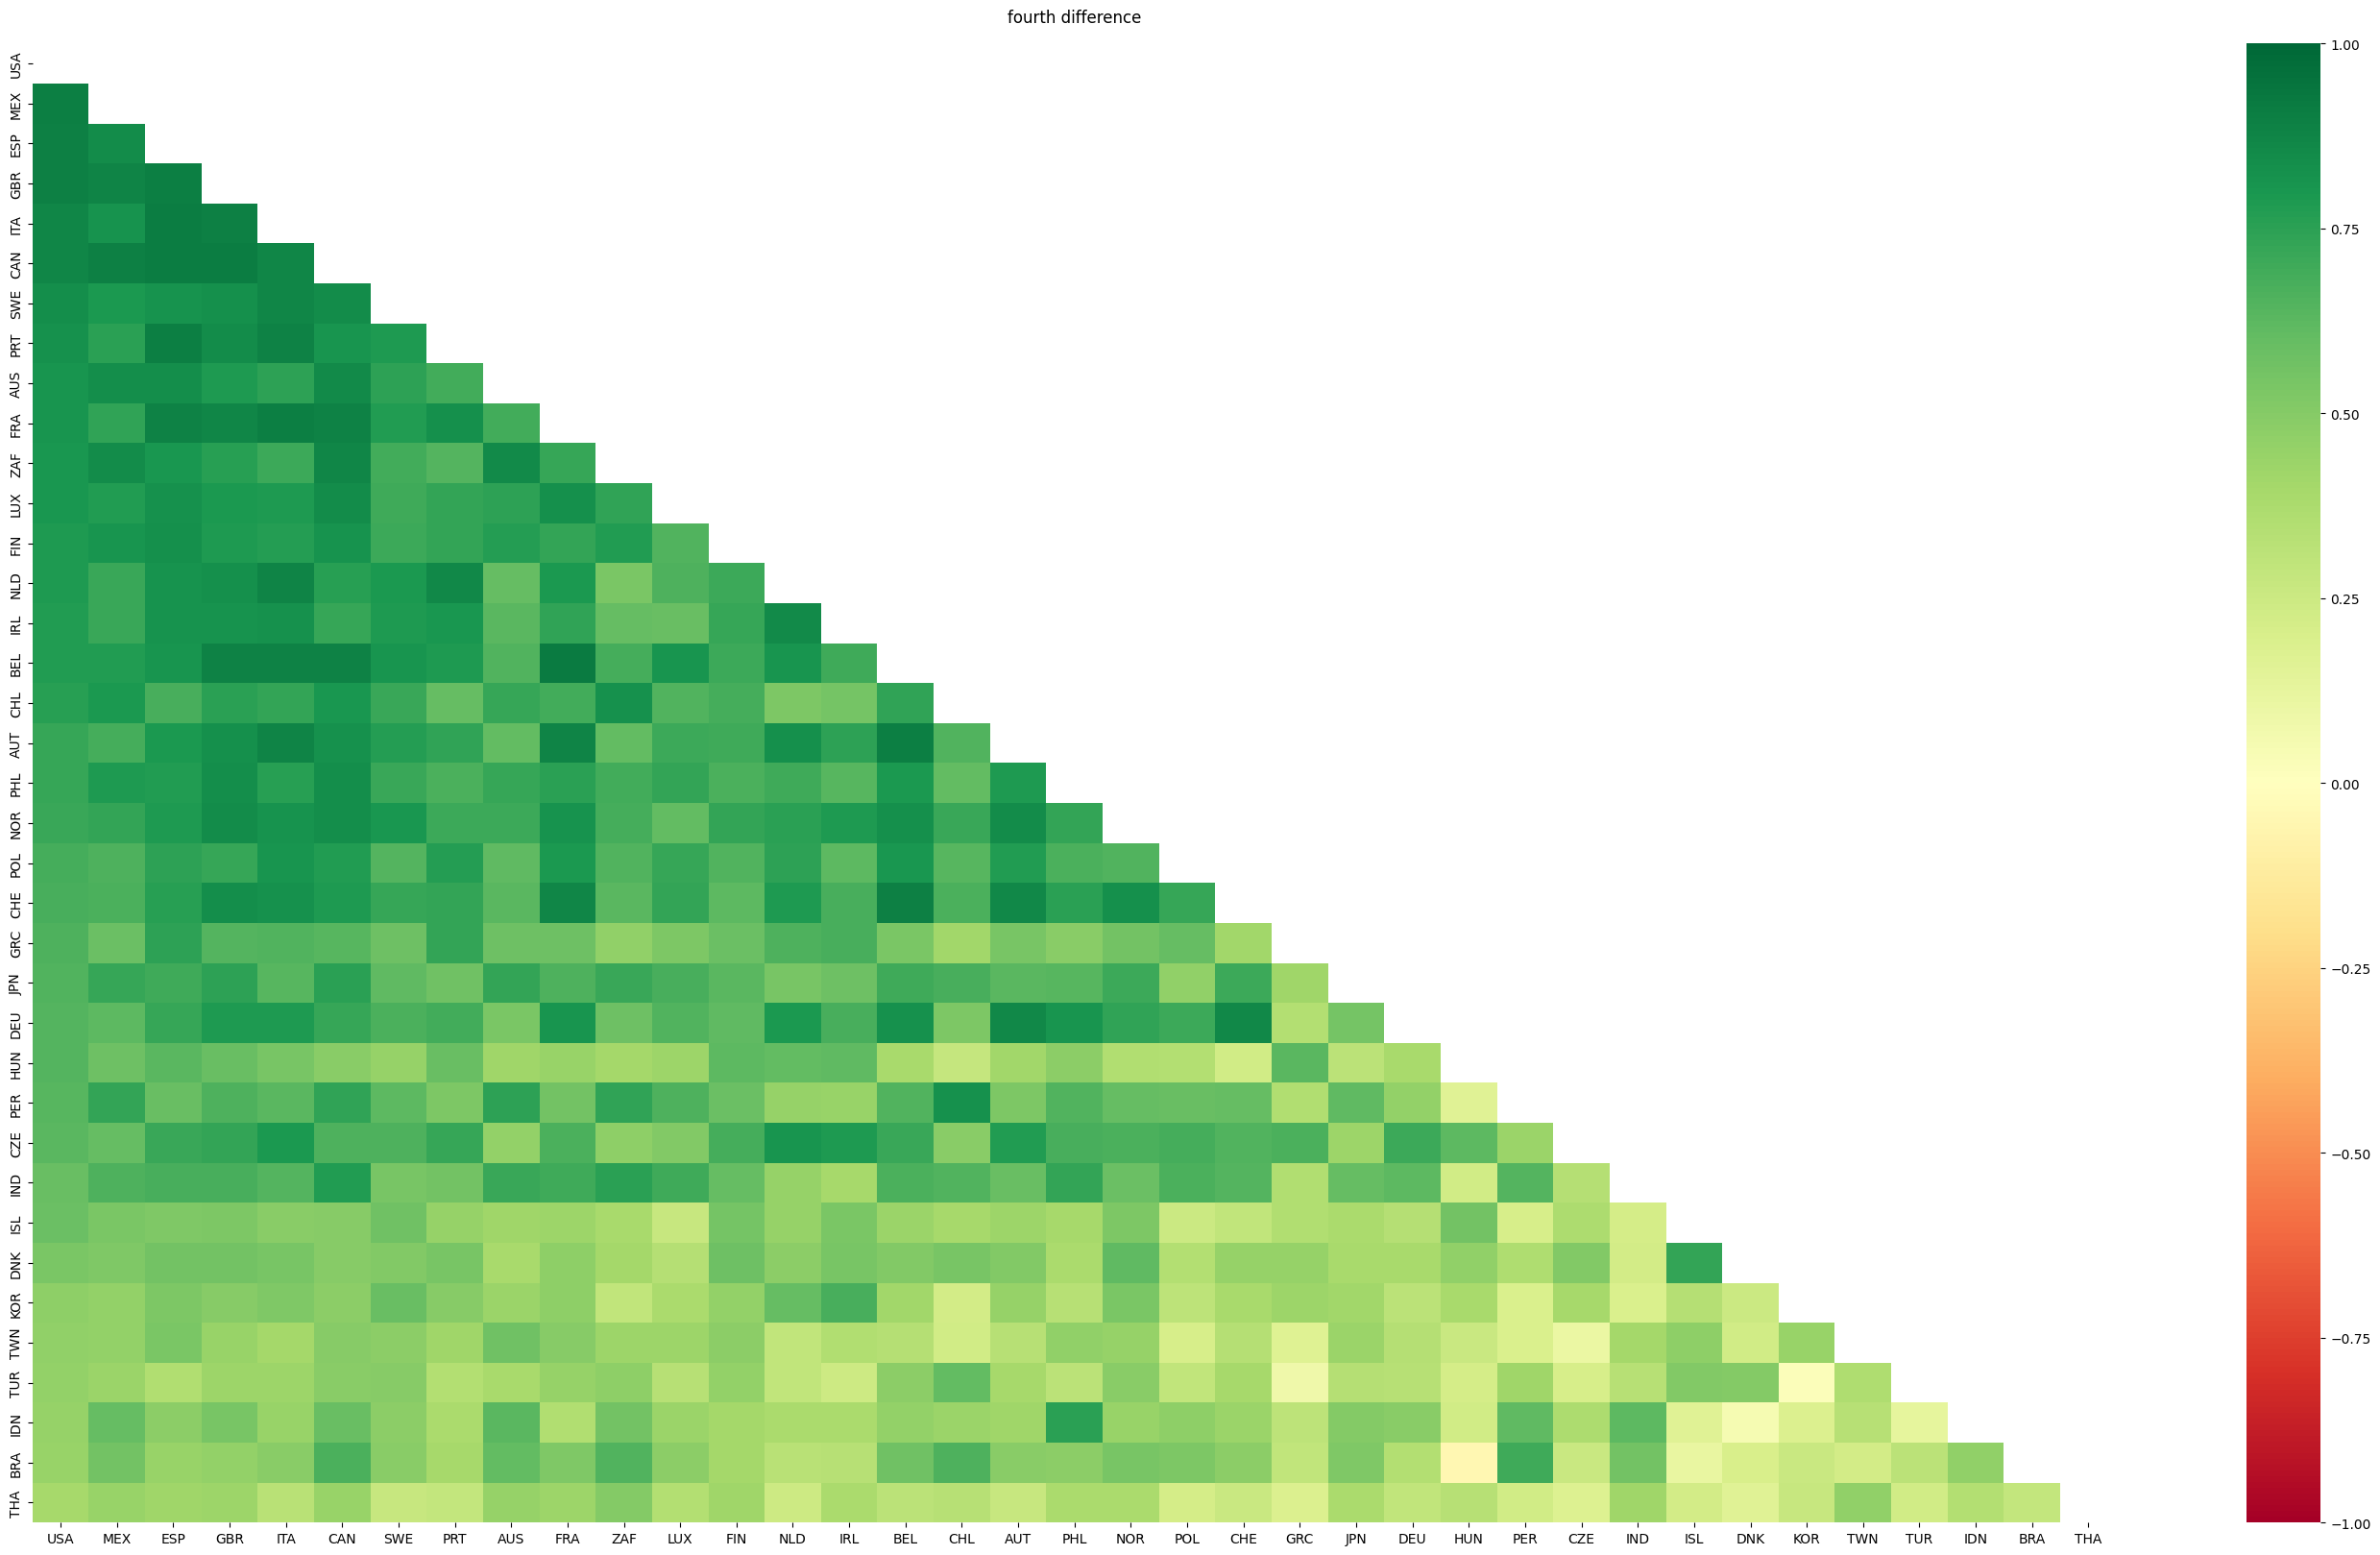

In [72]:

# show the heatmap visualisation

rcheatmap = rc_detrend.get_heatmap()

In [73]:
# show the reshaped version

rcreshaped = rc_detrend.get_organized()

rcreshaped.tail()

,iso3_firstcountry,iso3_secondcountry,correlation
1256,TUR,BRA,0.315745
1257,TUR,THA,0.227169
1293,IDN,BRA,0.466259
1294,IDN,THA,0.344544
1331,BRA,THA,0.282215


# look at some missing values that can cause issues with scipy linear detrending

In [74]:
lookatnansimf = imfipi[list(set(imfipi.columns) & set(frankelrosecountries))]
lookatnansimf = lookatnansimf.loc[(lookatnansimf.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansimf.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansimf[lookatnansimf.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_9548\2327253042.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansimf[lookatnansimf.isna().any(1)]


,FRA,PRT,DEU,AUT,GRC,DNK,USA,ESP,BEL,IRL,AUS,GBR,NZL,SWE,JPN,ITA,NOR,CAN,CHE,FIN,NLD
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,100.424965,111.762827,84.826325,66.118755,NaN,102.236210,92.451261,108.585343,71.294644,51.734178,67.916615,97.868837,85.362776,90.301261,100.808097,114.427091,117.238018,101.039949,73.800515,82.654978,81.914914
1998-04-01,101.791517,113.532586,84.972578,67.042201,NaN,101.981494,93.067178,109.496505,71.790391,51.828354,68.744976,96.954175,84.820189,91.533469,97.774200,114.767280,117.238018,101.570927,73.564419,83.907326,82.751631
1998-07-01,101.291559,113.002572,85.228519,68.076461,NaN,111.037223,93.757430,109.465085,71.439237,55.438445,68.322775,94.978505,84.807571,93.428913,96.567537,113.901345,114.508530,102.336458,73.756977,83.406387,82.871639
1998-10-01,101.924840,113.276717,83.912249,68.002586,NaN,96.263688,95.116695,110.784699,70.884964,55.877935,68.571471,95.417543,83.722397,92.930643,95.912491,112.602443,114.768481,103.964121,72.846849,83.187226,82.871639
1999-01-01,101.724856,115.372403,84.277879,68.187275,NaN,103.502188,95.806203,110.470505,70.451185,59.017145,69.556634,99.259124,85.526814,93.065311,97.326011,112.571517,113.631194,105.631622,73.370437,84.721353,84.125047
1999-04-01,103.224731,116.679161,85.082267,70.440484,NaN,100.206085,96.733441,111.161731,71.136280,58.420695,68.320594,99.661575,84.302839,93.361579,97.291535,111.829287,112.461413,106.908397,74.686600,86.192862,84.211719
1999-07-01,104.224648,115.905463,86.142596,71.326992,NaN,100.244102,97.599973,113.109732,72.482372,63.223686,68.908120,101.820177,86.410095,93.795882,98.705055,114.210608,115.418359,108.687344,76.711255,86.067627,85.411791
1999-10-01,106.557787,117.644761,87.202925,75.353218,NaN,108.463450,99.324434,114.837798,73.993712,65.986190,69.324403,102.588494,88.656151,95.492692,100.049622,115.942477,116.295695,110.607653,79.397507,88.415780,86.518524


In [75]:
lookatnansoecd = oecdemployment[list(set(oecdemployment.columns) & set(frankelrosecountries))]
lookatnansoecd = lookatnansoecd.loc[(lookatnansoecd.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd[lookatnansoecd.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_9548\1990012608.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd[lookatnansoecd.isna().any(1)]


,FRA,PRT,DEU,AUT,GRC,DNK,USA,ESP,BEL,IRL,AUS,GBR,NZL,SWE,JPN,ITA,NOR,CAN,CHE,FIN,NLD
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,NaN,66.53934,NaN,NaN,55.60656,NaN,73.76125,NaN,NaN,NaN,67.52501,71.27648,69.64523,NaN,69.92259,51.63791,NaN,68.53333,NaN,63.94550,NaN
1998-04-01,NaN,66.93438,NaN,NaN,55.85064,NaN,73.85174,NaN,NaN,NaN,67.72712,71.27740,69.02686,NaN,69.59286,51.87399,NaN,68.73333,78.04481,62.68186,NaN
1998-07-01,NaN,66.79893,NaN,NaN,56.13288,NaN,73.81985,NaN,NaN,NaN,67.87543,71.56174,68.99280,NaN,69.45416,52.07743,NaN,69.06667,NaN,64.54234,NaN
1998-10-01,NaN,67.12978,NaN,NaN,56.21347,NaN,73.94731,NaN,NaN,NaN,68.03833,71.78155,68.63832,NaN,69.27718,52.19458,NaN,69.36667,NaN,64.99767,NaN
1999-01-01,NaN,67.34690,NaN,68.66560,56.34367,76.23036,73.98904,52.92431,59.19458,NaN,67.99295,71.85828,69.25211,NaN,69.08689,52.42956,NaN,69.63333,NaN,65.71420,NaN
1999-04-01,NaN,67.31715,NaN,68.58568,55.80833,76.28310,73.89811,53.55390,59.02541,63.08013,68.06286,71.88622,69.20969,NaN,68.98834,52.60624,NaN,69.86667,78.42708,66.69583,NaN
1999-07-01,NaN,67.60715,NaN,68.56554,55.70330,76.19152,73.86938,54.12680,59.54280,63.77315,68.26156,72.11771,69.55880,NaN,69.01920,52.79292,NaN,70.13333,NaN,66.33366,NaN
1999-10-01,NaN,67.77253,NaN,68.35089,55.74428,75.45797,74.02946,54.76043,59.48914,64.18932,68.55666,72.27470,70.19769,NaN,68.99085,52.94587,NaN,70.50000,NaN,66.36963,NaN
2000-01-01,NaN,68.13086,NaN,68.46355,55.97697,76.23196,74.26453,55.46640,60.07680,64.62188,68.51775,72.26537,70.00667,NaN,68.75898,53.01252,77.42034,70.86667,NaN,66.33025,71.81953


In [76]:
lookatnansoecd_u = oecdunemployment[list(set(oecdunemployment.columns) & set(frankelrosecountries))]
lookatnansoecd_u = lookatnansoecd_u.loc[(lookatnansoecd_u.index >= pd.to_datetime('1998-01-01', format='%Y-%m-%d')) & (lookatnansoecd_u.index <= pd.to_datetime('2021-12-31', format='%Y-%m-%d'))]

lookatnansoecd_u[lookatnansoecd_u.isna().any(1)]

C:\Users\fuem\AppData\Local\Temp\ipykernel_9548\4105483854.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  lookatnansoecd_u[lookatnansoecd_u.isna().any(1)]


,FRA,PRT,DEU,AUT,GRC,DNK,USA,ESP,BEL,IRL,AUS,GBR,NZL,SWE,JPN,ITA,NOR,CAN,CHE,FIN,NLD
date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,NaN,5.948345,NaN,NaN,11.468570,NaN,4.722629,NaN,NaN,NaN,7.916938,6.418485,7.396619,NaN,3.833333,11.802680,NaN,8.633333,NaN,11.556580,NaN
1998-04-01,NaN,5.242820,NaN,NaN,11.373110,NaN,4.472419,NaN,NaN,NaN,7.839685,6.329114,8.040760,NaN,4.233333,12.093640,NaN,8.433333,3.687753,11.685220,NaN
1998-07-01,NaN,5.134938,NaN,NaN,11.451700,NaN,4.574889,NaN,NaN,NaN,7.855980,6.291696,7.785223,NaN,4.400000,11.954660,NaN,8.300000,NaN,11.661170,NaN
1998-10-01,NaN,5.054001,NaN,NaN,11.472540,NaN,4.425393,NaN,NaN,NaN,7.466447,6.202702,8.040742,NaN,4.600000,12.079750,NaN,8.133333,NaN,11.036510,NaN
1999-01-01,NaN,4.789545,NaN,3.964338,11.785310,5.420726,4.339256,16.550450,9.082825,NaN,7.160007,6.234792,7.513777,NaN,4.800000,11.786830,NaN,7.933333,NaN,10.427840,NaN
1999-04-01,NaN,5.141682,NaN,3.720332,12.415580,5.484908,4.290951,15.852840,9.144972,6.055307,6.965261,6.108781,7.461112,NaN,4.933333,11.691530,NaN,8.000000,3.167246,10.353780,NaN
1999-07-01,NaN,4.644143,NaN,3.609620,12.401250,5.673514,4.273862,15.554960,8.331983,5.574511,6.948439,5.933633,7.061230,NaN,4.900000,11.553400,NaN,7.566667,NaN,10.148900,NaN
1999-10-01,NaN,4.452120,NaN,3.733173,12.687780,5.843270,4.104529,15.218340,7.883254,5.279777,6.731554,5.860498,6.465258,NaN,4.866667,11.204450,NaN,7.066667,NaN,10.173790,NaN
2000-01-01,NaN,4.452434,NaN,4.008713,11.941690,5.016977,4.087547,14.533450,7.288741,4.859990,6.716907,5.852907,6.509148,NaN,5.000000,11.243720,3.373215,6.800000,NaN,10.536480,3.220637


# regressions demo: working with shares data

In [77]:
# import the shares data (original version)
shares_original = pd.read_pickle(cleandatapath+'FullData_OriginalData_plusExports.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (alternative version)
shares_alt = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_TSimportShares_Taiwan.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]

# import the shares data (edited version of original)
shares_altoriginal = pd.read_pickle(cleandatapath+'FullData_OurData_NScode_CorrectedOriginalVersion.pkl')[['iso3', 'year', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']]


# countries with enough invoicing data (can use any version, will have the same countries)
allsharescountries = list(shares_original.dropna()['iso3'].unique())

# organize shares data
dataversions = [shares_original, shares_alt, shares_altoriginal]
dataversions_names = ['original', 'alt', 'altoriginal']
sharesdata_dict = dict.fromkeys(dataversions_names)

# put the 3 versions of the data in their own dictionary entries
for i, version in enumerate(dataversions):
    # taking the same year range as the correlation data and only using one obs per year since it is annual data
    # only consider countries that we calculated correlation coefficients for
    version = version[(version['iso3'].isin(rgdp_sa.columns)) & ((version['year'] >= 1990) & (version['year'] <= 2021))].groupby(['iso3', 'year']).first().reset_index()
    # getting the averages
    version = version[['iso3', 'Import USD', 'Import EUR', 'Export USD', 'Export EUR']].groupby(['iso3'], as_index=False).mean()
    version = version.dropna()
    version.name = dataversions_names[i]
    # print(version)
    
    sharesdata_dict[version.name] = version

In [78]:
shares_correlations_alt = reg.prepare_shares(correlation_data=rgdpreshaped, shares_data=sharesdata_dict, version='alt')

shares_correlations_alt

,iso3_firstcountry,iso3_secondcountry,correlation,Import USD_first,Import EUR_first,Export USD_first,Export EUR_first,Import USD_second,Import EUR_second,Export USD_second,Export EUR_second,prod_import,prod_export
0,USA,BEL,0.907854,98.939792,0.507429,99.531321,0.147182,16.083156,81.674340,12.374198,82.669171,0.163271,0.124379
1,USA,GBR,0.888706,98.939792,0.507429,99.531321,0.147182,14.272166,10.645941,7.899275,7.820575,0.141749,0.078738
2,BEL,GBR,0.938824,16.083156,81.674340,12.374198,82.669171,14.272166,10.645941,7.899275,7.820575,0.109904,0.074427
3,USA,FRA,0.857161,98.939792,0.507429,99.531321,0.147182,7.939810,90.990423,5.932510,92.646513,0.083173,0.060411
4,BEL,FRA,0.953072,16.083156,81.674340,12.374198,82.669171,7.939810,90.990423,5.932510,92.646513,0.755928,0.773242
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,KOR,IDN,0.287447,43.070427,2.987932,31.694822,2.069987,29.211562,1.984696,26.485024,0.384930,0.126408,0.084023
492,BRA,IDN,0.391325,13.338156,1.587826,12.566527,0.457181,29.211562,1.984696,26.485024,0.384930,0.039278,0.033300
493,TWN,IDN,-0.045611,24.170890,1.791435,61.576214,1.631645,29.211562,1.984696,26.485024,0.384930,0.070962,0.163148
494,GRC,IDN,0.403062,16.960875,82.458296,11.933885,87.509288,29.211562,1.984696,26.485024,0.384930,0.065911,0.034975


In [79]:
# import consumption, centrality and nominal gdp shares

cons_ngdp_cent = pd.read_pickle(cleandatapath+'cons_ngdp_cent_for_regression.pkl')

worldcons = cons_ngdp_cent[['year', 'iso3', 'worldtotcons', 'totcons']]
cent = cons_ngdp_cent[['year', 'iso3', 'cent_exp']]
ngdpshares = cons_ngdp_cent[['year', 'iso3', 'gdpshare']]

# list of countries with consumption data
allconsumptioncountries = list(worldcons.dropna()['iso3'].unique())

# list of countries with centrality data
allcentcountries = list(cent.dropna()['iso3'].unique())

# list of countries with gdp share data
allngdpcountries = list(ngdpshares.dropna()['iso3'].unique())

# taking the same year range as the correlation data
# only consider countries that we calculated correlation coefficients for
worldcons = worldcons[(worldcons['iso3'].isin(rgdp_sa.columns)) & ((worldcons['year'] >= 1990) & (worldcons['year'] <= 2021))]
cent = cent[(cent['iso3'].isin(rgdp_sa.columns)) & ((cent['year'] >= 1990) & (cent['year'] <= 2021))]
ngdpshares = ngdpshares[(ngdpshares['iso3'].isin(rgdp_sa.columns)) & ((ngdpshares['year'] >= 1990) & (ngdpshares['year'] <= 2021))]

# define dataframe to put all the data into
correlations_covariates_alt = shares_correlations_alt.copy()

# make columns
correlations_covariates_alt['prod_worldconscorr'] = np.nan
correlations_covariates_alt['prod_ngdpshare'] = np.nan
correlations_covariates_alt['prod_cent'] = np.nan

# calculate covariates for each row (which already has each unique country pair)
for index, row in correlations_covariates_alt.iterrows():
    countryA = row['iso3_firstcountry']
    countryB = row['iso3_secondcountry']

    worldcorr_countryA = worldcons[worldcons['iso3'] == countryA][['totcons', 'worldtotcons']].corr()['totcons'][-1]
    worldcorr_countryB = worldcons[worldcons['iso3'] == countryB][['totcons', 'worldtotcons']].corr()['totcons'][-1]
    ngdpshare_countryA = ngdpshares[ngdpshares['iso3'] == countryA]['gdpshare'].mean()
    ngdpshare_countryB = ngdpshares[ngdpshares['iso3'] == countryB]['gdpshare'].mean()
    cent_countryA = cent[cent['iso3'] == countryA]['cent_exp'].mean()
    cent_countryB = cent[cent['iso3'] == countryB]['cent_exp'].mean()

    correlations_covariates_alt.at[index, 'prod_worldconscorr'] = worldcorr_countryA*worldcorr_countryB
    correlations_covariates_alt.at[index, 'prod_ngdpshare'] = ngdpshare_countryA*ngdpshare_countryB
    correlations_covariates_alt.at[index, 'prod_cent'] = cent_countryA*cent_countryB

# import bti
bti = pd.read_pickle(cleandatapath+'bti_for_regression.pkl')

# find average across years for each pair
bti = bti[['iso3_o', 'iso3_d', 'bti']].groupby(['iso3_o', 'iso3_d'], as_index=False).mean()

# merge bti with correlation data
bti.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)
correlations_covariates_alt = pd.merge(left=correlations_covariates_alt, right=bti, on=['iso3_firstcountry', 'iso3_secondcountry'], how='inner')

In [80]:
correlations_covariates_alt[['iso3_firstcountry', 'iso3_secondcountry', 'correlation', 'prod_import', 'prod_export', 'prod_worldconscorr', 'prod_ngdpshare', 'prod_cent', 'bti']]

,iso3_firstcountry,iso3_secondcountry,correlation,prod_import,prod_export,prod_worldconscorr,prod_ngdpshare,prod_cent,bti
0,USA,BEL,0.907854,0.163271,0.124379,0.964634,0.002302,1.077078e-05,0.002281
1,USA,GBR,0.888706,0.141749,0.078738,0.920382,0.011358,5.956612e-05,0.006003
2,USA,FRA,0.857161,0.083173,0.060411,0.919074,0.013465,5.280712e-05,0.003963
3,GBR,FRA,0.931814,0.108200,0.077141,0.869865,0.002279,5.506991e-05,0.014119
4,USA,DNK,0.848856,0.146751,0.113760,0.948452,0.001327,1.862852e-05,0.000579
...,...,...,...,...,...,...,...,...,...
426,ISL,IDN,0.163945,0.053880,0.054571,0.857787,0.000002,4.972508e-07,0.000018
427,KOR,IDN,0.287447,0.126408,0.084023,0.932518,0.000146,2.088852e-05,0.007386
428,BRA,IDN,0.391325,0.039278,0.033300,0.846065,0.000188,6.871230e-06,0.000716
429,GRC,IDN,0.403062,0.065911,0.034975,0.943741,0.000037,3.398004e-06,0.000239


In [81]:
# run OLS regression
reg.Regressions(correlations_covariates_alt, dependent_var=['correlation'], independent_vars=['prod_import', 'bti']).run_regression(method='OLS').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            correlation   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     56.91
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.21e-22
Time:                        14:52:23   Log-Likelihood:                 196.96
No. Observations:                 431   AIC:                            -387.9
Df Residuals:                     428   BIC:                            -375.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5481      0.011     52.118      0.000       0.527       0.569
prod_import     0.1937      0.032      5.987      0.000       0.130       0.257
bti            12.1045      1.855      6.525      0.000       8.458      15.751
==============================================================================
Omnibus:                       23.623   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.125
Skew:                          -0.598   Prob(JB):                     2.12e-06
Kurtosis:                       3.162   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# regressions demo: working with instrumental variables

In [82]:
# import the frankel and rose data (the original data is in a stata dataset)
instruments = pd.read_stata(ocadatapath + 'DATAV4.dta')

# Load dataframe with IMF country code in 'IMF' column and iso3 country code in 'iso3' column
country_code_mapping = pd.read_csv(rawdatapath+'Country_iso_codes.csv')
country_code_mapping = country_code_mapping[['iso3','IMF']]

# Make a dictionary out of the dataframe
dict = country_code_mapping.set_index('IMF').to_dict()['iso3']

# Replace IMF country codes in CountryCode and PartnerCode columns
# by corresponding ISO3 country codes
instruments['count1']= instruments['count1'].map(dict)
instruments['count2']= instruments['count2'].map(dict)

# log distance
instruments['distance'] = np.log(instruments['distance'])

# log trade intensity
instruments['wt'] = np.log(instruments['wt'])

# complete batch of correlations used in paper
versions = ['dy', 'di', 'de', 'du', 'ty', 'ti', 'te', 'tu', 'hy', 'hi', 'he', 'hu', 'sy', 'si', 'se', 'su', 'oy', 'oi', 'oe', 'ou']

# variable descriptions from stata
stata_descriptions = ["Bilateral Output Correlation, Differenced Data", "Bilateral IP Correlation, Differenced Data", "Bilateral Empl'y Correlation, Differenced Data", 
 "Bilateral Unem't Correlation, Differenced Data", "Bilateral Output Correlation, De-Trended Data", "Bilateral IP Correlation, De-Trended Data", 
 "Bilateral Empl'y Correlation, De-Trended Data", "Bilateral Unem't Correlation, De-Trended Data", "Bilateral Output Correlation, HP-Filtered Data", 
 "Bilateral IP Correlation, HP-Filtered Data", "Bilateral Empl'y Correlation, HP-Filtered Data", "Bilateral Unem't Correlation, HP-Filtered Data", 
 "Bilateral Output Correlation, HP-SA Data", "Bilateral IP Correlation, HP-SA Data", "Bilateral Empl'y Correlation, HP-SA Data", 
 "Bilateral Unem't Correlation, HP-SA Data", "Bilateral Output Correlation, Oil De-Trended Data", "Bilateral IP Correlation, Oil De-Trended Data", 
 "Bilateral Empl'y Correlation, Oil De-Trended Data", "Bilateral Unem't Correlation, Oil De-Trended Data"]

# multiply correlation coefficients by 100
for i, version in enumerate(versions):
    instruments[version] = instruments[version]*100

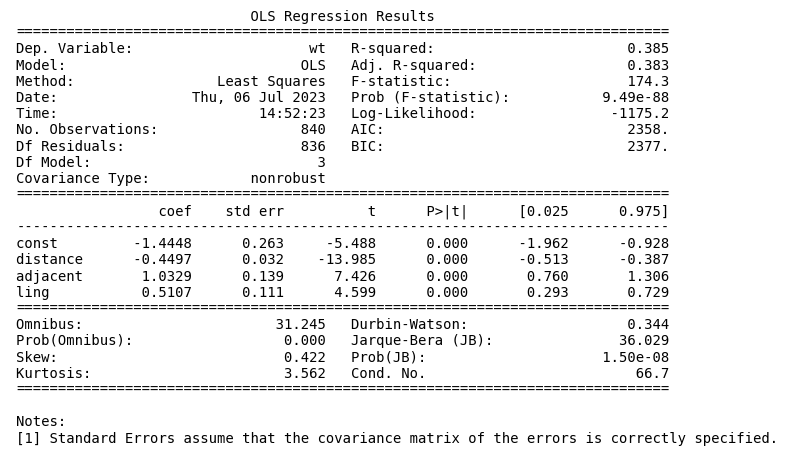

In [83]:
# look at the first stage results
y = instruments[['wt']]
X = instruments[['distance', 'adjacent', 'ling']]
X = sm.add_constant(X)
firststagemodel = sm.OLS(y,X)
firststageresults = firststagemodel.fit()

plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(firststageresults.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()

# not sure what's happening with the magnitude of estimated coefficients for first stage
# missing one of the transformations maybe?

In [84]:
# run IV regressions

# dataframe to hold results:
iv_results_2sls = pd.DataFrame(columns=['Type of correlation', 'Description', 'Estimated slope coefficient (normalized by total trade)','Standard error'])
iv_results_2sls.name = "2SLS"
iv_results_ml = iv_results_2sls.copy()
iv_results_ml.name = "ML"
iv_results_gmm = iv_results_2sls.copy()
iv_results_gmm.name = "GMM"

for i, version in enumerate(versions):
    for table in [iv_results_2sls, iv_results_ml, iv_results_gmm]:
        result = reg.Regressions(instruments, dependent_var=[version], independent_vars=['wt']).run_regression(method='IV', instrument_vars=['distance', 'adjacent', 'ling'], iv_type=table.name)
        beta = result.params[1]
        se = result.std_errors[1]
        description = stata_descriptions[i]

        table.loc[i] = [version, description, beta, se]

In [85]:
# show the table of coefficients of iv results (2sls)
iv_results_2sls[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",12.883916,2.002774
1,di,"Bilateral IP Correlation, Differenced Data",10.340488,1.618287
2,de,"Bilateral Empl'y Correlation, Differenced Data",9.067585,2.332991
3,du,"Bilateral Unem't Correlation, Differenced Data",6.877527,1.919077
4,ty,"Bilateral Output Correlation, De-Trended Data",13.077156,2.319156
5,ti,"Bilateral IP Correlation, De-Trended Data",11.320280,2.300162
6,te,"Bilateral Empl'y Correlation, De-Trended Data",12.524879,3.102763
7,tu,"Bilateral Unem't Correlation, De-Trended Data",8.724324,2.625411
8,hy,"Bilateral Output Correlation, HP-Filtered Data",10.625983,1.962809
9,hi,"Bilateral IP Correlation, HP-Filtered Data",10.191467,1.673902


In [86]:
# show the table of coefficients of iv results (mle)
iv_results_ml[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",12.909146,2.010897
1,di,"Bilateral IP Correlation, Differenced Data",10.345812,1.619907
2,de,"Bilateral Empl'y Correlation, Differenced Data",9.284482,2.425977
3,du,"Bilateral Unem't Correlation, Differenced Data",7.025042,1.966657
4,ty,"Bilateral Output Correlation, De-Trended Data",13.082534,2.321516
5,ti,"Bilateral IP Correlation, De-Trended Data",11.342104,2.313357
6,te,"Bilateral Empl'y Correlation, De-Trended Data",12.727907,3.180315
7,tu,"Bilateral Unem't Correlation, De-Trended Data",8.752541,2.662683
8,hy,"Bilateral Output Correlation, HP-Filtered Data",10.754527,2.018511
9,hi,"Bilateral IP Correlation, HP-Filtered Data",10.301530,1.702311


In [87]:
# show the table of coefficients of iv results (gmm)
iv_results_gmm[:16]

,Type of correlation,Description,Estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",12.823466,2.001998
1,di,"Bilateral IP Correlation, Differenced Data",10.319679,1.617748
2,de,"Bilateral Empl'y Correlation, Differenced Data",8.502251,2.330882
3,du,"Bilateral Unem't Correlation, Differenced Data",7.654844,1.890351
4,ty,"Bilateral Output Correlation, De-Trended Data",13.120894,2.317359
5,ti,"Bilateral IP Correlation, De-Trended Data",11.260043,2.299944
6,te,"Bilateral Empl'y Correlation, De-Trended Data",11.752039,3.091809
7,tu,"Bilateral Unem't Correlation, De-Trended Data",8.577558,2.626095
8,hy,"Bilateral Output Correlation, HP-Filtered Data",10.396848,1.962055
9,hi,"Bilateral IP Correlation, HP-Filtered Data",10.504086,1.665708


In [88]:
# look at a regular OLS regression of correlations on wt
ols_results = pd.DataFrame(columns=['Type of correlation', 'Description', 'OLS estimated slope coefficient (normalized by total trade)','Standard error'])

for i, version in enumerate(versions):
    result = reg.Regressions(instruments, dependent_var=[version], independent_vars=['wt']).run_regression(method='OLS')
    beta = result.params[1]
    se = result.bse[1]
    description = stata_descriptions[i]

    ols_results.loc[i] = [version, description, beta, se]

In [89]:
ols_results[:16]

,Type of correlation,Description,OLS estimated slope coefficient (normalized by total trade),Standard error
0,dy,"Bilateral Output Correlation, Differenced Data",8.344721,1.026013
1,di,"Bilateral IP Correlation, Differenced Data",6.496280,0.970309
2,de,"Bilateral Empl'y Correlation, Differenced Data",5.138654,1.271181
3,du,"Bilateral Unem't Correlation, Differenced Data",2.590518,1.081393
4,ty,"Bilateral Output Correlation, De-Trended Data",9.208576,1.330008
5,ti,"Bilateral IP Correlation, De-Trended Data",8.564367,1.282409
6,te,"Bilateral Empl'y Correlation, De-Trended Data",6.635117,1.723232
7,tu,"Bilateral Unem't Correlation, De-Trended Data",7.274259,1.626819
8,hy,"Bilateral Output Correlation, HP-Filtered Data",7.332962,1.032858
9,hi,"Bilateral IP Correlation, HP-Filtered Data",5.500518,1.000013


In [111]:
# import gravity model data from CEPII
cepii_data = pd.read_stata(gravitydatapath + 'Gravity_filtered.dta')
cepii_data.rename(columns={'iso3_o': 'iso3_firstcountry', 'iso3_d': 'iso3_secondcountry'}, inplace=True)

# add to our data
correlations_covariates_alt_merged = pd.merge(left=correlations_covariates_alt, right=cepii_data, how='left', on=['iso3_firstcountry', 'iso3_secondcountry'])
correlations_covariates_alt_merged.rename(columns={'correlation': 'rgdp_hp_correlation'}, inplace=True)

In [112]:
correlations_covariates_alt_merged.head()

,iso3_firstcountry,iso3_secondcountry,rgdp_hp_correlation,Import USD_first,Import EUR_first,Export USD_first,Export EUR_first,Import USD_second,Import EUR_second,Export USD_second,Export EUR_second,prod_import,prod_export,prod_worldconscorr,prod_ngdpshare,prod_cent,bti,dist,contig,comlang_off,logdist
0,USA,BEL,0.907854,98.939792,0.507429,99.531321,0.147182,16.083156,81.674340,12.374198,82.669171,0.163271,0.124379,0.964634,0.002302,0.000011,0.002281,5904,0,0,8.683385
1,USA,GBR,0.888706,98.939792,0.507429,99.531321,0.147182,14.272166,10.645941,7.899275,7.820575,0.141749,0.078738,0.920382,0.011358,0.000060,0.006003,5585,0,1,8.627840
2,USA,FRA,0.857161,98.939792,0.507429,99.531321,0.147182,7.939810,90.990423,5.932510,92.646513,0.083173,0.060411,0.919074,0.013465,0.000053,0.003963,5852,0,0,8.674539
3,GBR,FRA,0.931814,14.272166,10.645941,7.899275,7.820575,7.939810,90.990423,5.932510,92.646513,0.108200,0.077141,0.869865,0.002279,0.000055,0.014119,344,0,0,5.840641
4,USA,DNK,0.848856,98.939792,0.507429,99.531321,0.147182,14.393286,85.606714,11.298418,88.701582,0.146751,0.113760,0.948452,0.001327,0.000019,0.000579,6204,0,0,8.732949


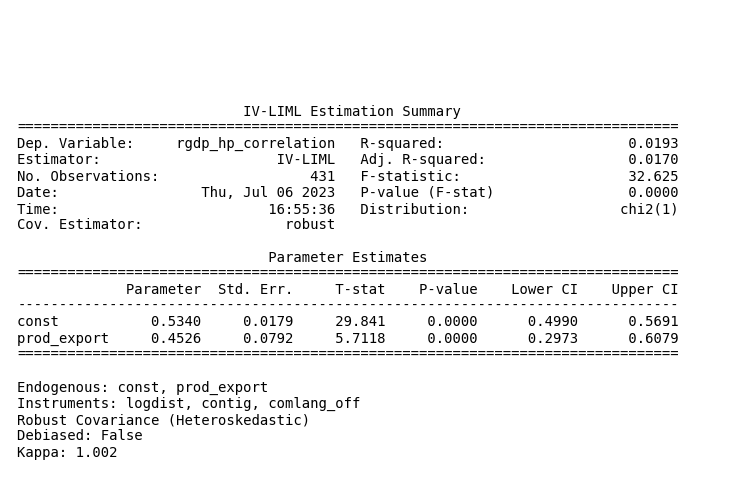

IV-LIML Estimation Summary                          
===============================================================================
Dep. Variable:     rgdp_hp_correlation   R-squared:                      0.0193
Estimator:                     IV-LIML   Adj. R-squared:                 0.0170
No. Observations:                  431   F-statistic:                    32.625
Date:                 Thu, Jul 06 2023   P-value (F-stat)                0.0000
Time:                         16:55:36   Distribution:                  chi2(1)
Cov. Estimator:                 robust                                         
                                                                               
                              Parameter Estimates                              
===============================================================================
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           0.5340     0.0179     29.841     0.0000      0.4990      0.5691
prod_export     0.4526     0.0792     5.7118     0.0000      0.2973      0.6079
===============================================================================

Endogenous: const, prod_export
Instruments: logdist, contig, comlang_off
Robust Covariance (Heteroskedastic)
Debiased: False
Kappa: 1.002
IVResults, id: 0x212843f9990

In [121]:
# output correlations on export shares:
reg.Regressions(correlations_covariates_alt_merged, dependent_var=['rgdp_hp_correlation'], independent_vars=['prod_export']).run_regression(method='IV', instrument_vars=['logdist', 'contig', 'comlang_off'], iv_type='ML')